## Final Project : E503 : Multi-variate Time Series Forecasting - Air Pollution

### Importing required libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from sklearn.impute import SimpleImputer
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [172]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/AirQuality.csv', delimiter=';')

# Display the first few rows of the DataFrame
data.head()

Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578          NaN          NaN  
1  0,7255          NaN          NaN  
2  0,7502          NaN          NaN  
3  0,7867          NaN          NaN  
4  0,7888          NaN          NaN

In [173]:
# shape of our dataset
print("Number of rows in dataset:",data.shape[0])
print("Number of columns in dataset:",data.shape[1])

Number of rows in dataset: 9471
Number of columns in dataset: 17


In [174]:
# getting the names of the columns
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [175]:
# getting the dtypes of the all columns
data.describe(include = "all")

Date      Time CO(GT)  PT08.S1(CO)     NMHC(GT) C6H6(GT)  \
count         9357      9357   9357  9357.000000  9357.000000     9357   
unique         391        24    104          NaN          NaN      408   
top     21/09/2004  18.00.00   -200          NaN          NaN   -200,0   
freq            24       390   1592          NaN          NaN      366   
mean           NaN       NaN    NaN  1048.990061  -159.090093      NaN   
std            NaN       NaN    NaN   329.832710   139.789093      NaN   
min            NaN       NaN    NaN  -200.000000  -200.000000      NaN   
25%            NaN       NaN    NaN   921.000000  -200.000000      NaN   
50%            NaN       NaN    NaN  1053.000000  -200.000000      NaN   
75%            NaN       NaN    NaN  1221.000000  -200.000000      NaN   
max            NaN       NaN    NaN  2040.000000  1189.000000      NaN   

        PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  \
count     9357.000000  9357.000000   9357.000000  9357.000000   9357.000000   
unique            NaN          NaN           NaN          NaN           NaN   
top               NaN          NaN           NaN          NaN           NaN   
freq              NaN          NaN           NaN          NaN           NaN   
mean       894.595276   168.616971    794.990168    58.148873   1391.479641   
std        342.333252   257.433866    321.993552   126.940455    467.210125   
min       -200.000000  -200.000000   -200.000000  -200.000000   -200.000000   
25%        711.000000    50.000000    637.000000    53.000000   1185.000000   
50%        895.000000   141.000000    794.000000    96.000000   1446.000000   
75%       1105.000000   284.000000    960.000000   133.000000   1662.000000   
max       2214.000000  1479.000000   2683.000000   340.000000   2775.000000   

        PT08.S5(O3)     T    RH    AH  Unnamed: 15  Unnamed: 16  
count   9357.000000  9357  9357  9357          0.0          0.0  
unique          NaN   437   754  6684          NaN          NaN  
top             NaN  -200  -200  -200          NaN          NaN  
freq            NaN   366   366   366          NaN          NaN  
mean     975.072032   NaN   NaN   NaN          NaN          NaN  
std      456.938184   NaN   NaN   NaN          NaN          NaN  
min     -200.000000   NaN   NaN   NaN          NaN          NaN  
25%      700.000000   NaN   NaN   NaN          NaN          NaN  
50%      942.000000   NaN   NaN   NaN          NaN          NaN  
75%     1255.000000   NaN   NaN   NaN          NaN          NaN  
max     2523.000000   NaN   NaN   NaN          NaN          NaN

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [177]:
# checking null values in our dataset
data.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [178]:
# Check for non-null values in the unnamed columns
non_null_values = data[['Unnamed: 15', 'Unnamed: 16']].dropna()

# Display any non-null values (if they exist)
non_null_values


Empty DataFrame
Columns: [Unnamed: 15, Unnamed: 16]
Index: []

In [179]:
# Dropping the unnamed columns
data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

In [180]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [181]:
data.tail(114)

Date Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
9357  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9358  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9359  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9360  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9361  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
...   ...  ...    ...          ...       ...      ...            ...      ...   
9466  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9467  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9468  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9469  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   
9470  NaN  NaN    NaN          NaN       NaN      NaN            NaN      NaN   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    T   RH   AH  
9357           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9358           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9359           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9360           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9361           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
...            ...      ...           ...          ...  ...  ...  ...  
9466           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9467           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9468           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9469           NaN      NaN           NaN          NaN  NaN  NaN  NaN  
9470           NaN      NaN           NaN          NaN  NaN  NaN  NaN  

[114 rows x 15 columns]

In [182]:
# dropping the last 114 rows which are fully empty
data.dropna(inplace=True)

In [183]:
# Checking null values in our dataset
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [184]:
# Columns with comma as decimal separator
comma_decimal_columns = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

# Replace comma with period and convert to float
for col in comma_decimal_columns:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Display the cleaned data
data.head()


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [185]:
# Replace -200 (placeholder for missing values) with NaN
data.replace(-200, np.nan, inplace=True)

In [186]:
data.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [187]:
percent_NaN = []
columns = data.columns
for col in columns:
    pNaN =  (data[col].isna().sum()/data.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False)
print(nan_percent_df)

               %_NaN_in_Column
NMHC(GT)             90.231912
CO(GT)               17.986534
NO2(GT)              17.548360
NOx(GT)              17.516298
PT08.S1(CO)           3.911510
C6H6(GT)              3.911510
PT08.S2(NMHC)         3.911510
PT08.S3(NOx)          3.911510
PT08.S4(NO2)          3.911510
PT08.S5(O3)           3.911510
T                     3.911510
RH                    3.911510
AH                    3.911510
Date                  0.000000
Time                  0.000000


In [188]:
data.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore')
data = data.dropna()
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1  10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2  10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3  10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4  10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB


### Since the data is real valued, we should replace all the null values with mean of each column

In [190]:
# for i in data:
#     data[i] = data[i].fillna(data[i].mean())

In [191]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [192]:
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1  10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2  10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3  10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4  10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

### Handling Outliers

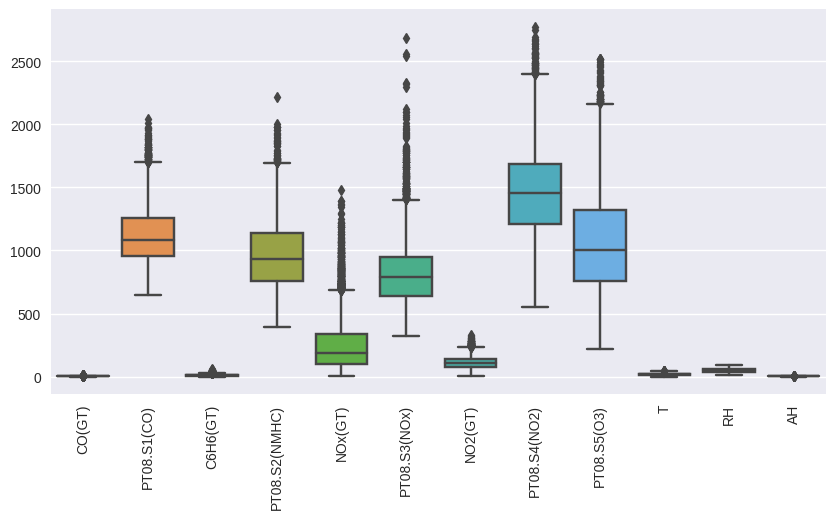

In [193]:
# plotting a boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.xticks(rotation='vertical')
plt.show()

Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset.

It is necessary to handle outliers because they affect the model's distribution and ultimately the model's accuracy.

We can use boxplot to get an idea of the outliers present in the dataset.

The box represents the interquartile range (IQR), with the median indicated by a line inside the box.

Any points outside the whiskers are considered potential outliers.

In [194]:
numerical_columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']

In [195]:
df = data[numerical_columns]

In [196]:
# Detecting outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [197]:
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(f'Number of outliers in each column:\n{outliers}')

Number of outliers in each column:
CO(GT)           191
PT08.S1(CO)       89
C6H6(GT)         160
PT08.S2(NMHC)     46
NOx(GT)          354
PT08.S3(NOx)     182
NO2(GT)           90
PT08.S4(NO2)      58
PT08.S5(O3)       56
T                  8
RH                 0
AH                22
dtype: int64


In [198]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
mask

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0      False        False     False          False    False         False   
1      False        False     False          False    False         False   
2      False        False     False          False    False         False   
3      False        False     False          False    False         False   
4      False        False     False          False    False         False   
...      ...          ...       ...            ...      ...           ...   
9352   False        False     False          False    False         False   
9353   False        False     False          False    False         False   
9354   False        False     False          False    False         False   
9355   False        False     False          False    False         False   
9356   False        False     False          False    False         False   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)      T     RH     AH  
0       False         False        False  False  False  False  
1       False         False        False  False  False  False  
2       False         False        False  False  False  False  
3       False         False        False  False  False  False  
4       False         False        False  False  False  False  
...       ...           ...          ...    ...    ...    ...  
9352    False         False        False  False  False  False  
9353    False         False        False  False  False  False  
9354    False         False        False  False  False  False  
9355    False         False        False  False  False  False  
9356    False         False        False  False  False  False  

[6941 rows x 12 columns]

In [199]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

In [200]:
# outliers are now being handled and are replaced with that column's median value
((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

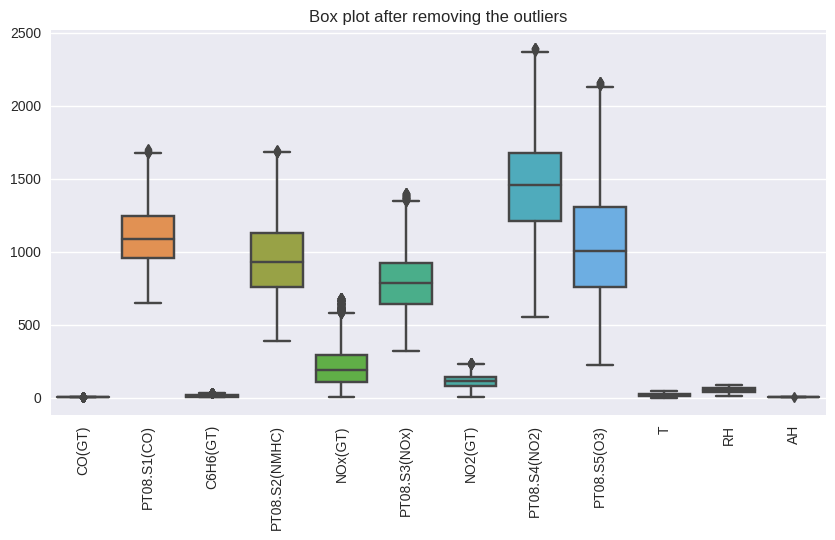

In [201]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.title('Box plot after removing the outliers')
plt.show()

### Checking if there are any categorical features and if there are any, we have to convert them to numerical features

In [202]:
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [203]:
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1  10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2  10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3  10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4  10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888

#### As we can see above, there aren't any categorical featutres in our dataset

# Exploratory Data Analysis and Visualization

In [204]:
# using pearson's correlation to find the correlation between all the features
df.corr()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.810697  0.866790       0.850195  0.633051   
PT08.S1(CO)    0.810697     1.000000  0.820084       0.851557  0.575454   
C6H6(GT)       0.866790     0.820084  1.000000       0.923399  0.553576   
PT08.S2(NMHC)  0.850195     0.851557  0.923399       1.000000  0.575558   
NOx(GT)        0.633051     0.575454  0.553576       0.575558  1.000000   
PT08.S3(NOx)  -0.687801    -0.751999 -0.711799      -0.760920 -0.640865   
NO2(GT)        0.635611     0.603619  0.577850       0.615175  0.663508   
PT08.S4(NO2)   0.556991     0.630528  0.705353       0.740083  0.123793   
PT08.S5(O3)    0.782181     0.862203  0.802455       0.847726  0.650630   
T              0.047930     0.035286  0.213345       0.235719 -0.230311   
RH             0.021564     0.161618 -0.056935      -0.059329  0.168956   
AH             0.057393     0.153534  0.182002       0.206862 -0.126084   

               PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)         T  \
CO(GT)            -0.687801  0.635611      0.556991     0.782181  0.047930   
PT08.S1(CO)       -0.751999  0.603619      0.630528     0.862203  0.035286   
C6H6(GT)          -0.711799  0.577850      0.705353     0.802455  0.213345   
PT08.S2(NMHC)     -0.760920  0.615175      0.740083     0.847726  0.235719   
NOx(GT)           -0.640865  0.663508      0.123793     0.650630 -0.230311   
PT08.S3(NOx)       1.000000 -0.609393     -0.470190    -0.783919 -0.048707   
NO2(GT)           -0.609393  1.000000      0.129593     0.671314 -0.185165   
PT08.S4(NO2)      -0.470190  0.129593      1.000000     0.538373  0.582925   
PT08.S5(O3)       -0.783919  0.671314      0.538373     1.000000 -0.037112   
T                 -0.048707 -0.185165      0.582925    -0.037112  1.000000   
RH                -0.150844 -0.096993     -0.019116     0.163382 -0.559456   
AH                -0.198299 -0.323798      0.651475     0.091604  0.660884   

                     RH        AH  
CO(GT)         0.021564  0.057393  
PT08.S1(CO)    0.161618  0.153534  
C6H6(GT)      -0.056935  0.182002  
PT08.S2(NMHC) -0.059329  0.206862  
NOx(GT)        0.168956 -0.126084  
PT08.S3(NOx)  -0.150844 -0.198299  
NO2(GT)       -0.096993 -0.323798  
PT08.S4(NO2)  -0.019116  0.651475  
PT08.S5(O3)    0.163382  0.091604  
T             -0.559456  0.660884  
RH             1.000000  0.176601  
AH             0.176601  1.000000

In [ ]:
# plt.figure(figsize=(15, 10))

# sns.heatmap(df.corr(), cmap='YlGnBu',center=0,annot=True,fmt='.2f',linewidths=0.5,
#             cbar_kws={'shrink': 0.5, 'ticks': [-1, -0.5, 0, 0.5, 1]} )
# plt.title('Correlation Matrix Heatmap')
# plt.show()

In [ ]:
# sns.pairplot(df)

# # Adjust the plot aesthetics
# sns.set(font_scale=1.2)
# plt.subplots_adjust(top=0.95)

# # Add a title to the plot
# plt.suptitle('Pair Plot of the Dataset', fontsize=18)

# # Show the plot
# plt.show()

In [33]:
# def summary_plot(dataset, period='M'):
#     summary = dataset.resample(period).mean()  # 'M' stands for month-end frequency

#     summary.plot(kind='line', figsize=(15, 8))
#     plt.title('Summary Plot')
#     plt.xlabel('Time')
#     plt.ylabel('Values')
#     plt.show()

In [111]:
# # Combine Date and Time columns into a single datetime column
# data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')

# # Drop the original Date and Time columns
# data.drop(columns=['Date', 'Time'], inplace=True)

# # Reorder the columns to have DateTime as the first column
# column_order = ['DateTime'] + [col for col in data if col != 'DateTime']
# data = data[column_order]

# # Display the cleaned and restructured data
# data.head()

DateTime  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0 2004-03-10 18:00:00     2.6       1360.0      11.9         1046.0    166.0   
1 2004-03-10 19:00:00     2.0       1292.0       9.4          955.0    103.0   
2 2004-03-10 20:00:00     2.2       1402.0       9.0          939.0    131.0   
3 2004-03-10 21:00:00     2.2       1376.0       9.2          948.0    172.0   
4 2004-03-10 22:00:00     1.6       1272.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888

(6941, 14)

In [205]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Combine Date and Time into a single DateTime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')

# Set this combined column as the DataFrame index
data.set_index('DateTime', inplace=True)

# Drop the original Date and Time columns as they are no longer needed
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Group by Date and calculate daily means
daily_data = data.resample('D').mean()

# Fill missing dates with the mean of each column
# First, create a continuous date range
all_dates = pd.date_range(start=daily_data.index.min(), end=daily_data.index.max(), freq='D')

# Reindex the DataFrame to this date range, filling missing values with NaN
daily_data = daily_data.reindex(all_dates)

# Fill NaN values with the column-wise mean
daily_data.fillna(daily_data.mean(), inplace=True)

# Check the resulting DataFrame
print(daily_data.head())


              CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
2004-03-10  1.966667  1316.500000   8.450000     912.333333  132.000000   
2004-03-11  2.313636  1265.409091   8.568182     879.954545  150.000000   
2004-03-12  2.900000  1309.285714  12.666667    1036.476190  181.000000   
2004-03-13  2.740909  1346.227273  11.381818    1010.181818  187.863636   
2004-03-14  2.472727  1372.409091   9.836364     950.590909  150.090909   

            PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)          T  \
2004-03-10   1167.333333  108.833333   1545.500000  1096.000000  12.033333   
2004-03-11   1233.227273  102.863636   1550.727273   922.727273   9.804545   
2004-03-12   1052.619048  120.285714   1651.238095  1121.000000  11.838095   
2004-03-13    978.454545  120.500000   1613.954545  1268.818182  13.363636   
2004-03-14    999.090909  111.681818   1608.409091  1240.545455  16.390909   

                   RH        AH  
2004-03-10  54.900000  0.765633  
2004-03-11  

In [206]:
dataviz=daily_data
dataviz.shape
# dataviz.to_csv('/content/cleaned_air.csv',sep=',')

(391, 12)

In [207]:
dataviz.head()

CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
2004-03-10  1.966667  1316.500000   8.450000     912.333333  132.000000   
2004-03-11  2.313636  1265.409091   8.568182     879.954545  150.000000   
2004-03-12  2.900000  1309.285714  12.666667    1036.476190  181.000000   
2004-03-13  2.740909  1346.227273  11.381818    1010.181818  187.863636   
2004-03-14  2.472727  1372.409091   9.836364     950.590909  150.090909   

            PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)          T  \
2004-03-10   1167.333333  108.833333   1545.500000  1096.000000  12.033333   
2004-03-11   1233.227273  102.863636   1550.727273   922.727273   9.804545   
2004-03-12   1052.619048  120.285714   1651.238095  1121.000000  11.838095   
2004-03-13    978.454545  120.500000   1613.954545  1268.818182  13.363636   
2004-03-14    999.090909  111.681818   1608.409091  1240.545455  16.390909   

                   RH        AH  
2004-03-10  54.900000  0.765633  
2004-03-11  64.413636  0.778191  
2004-03-12  49.614286  0.667024  
2004-03-13  49.918182  0.733727  
2004-03-14  47.631818  0.848382

In [208]:
dataviz.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [209]:
# Ensure a continuous hourly index
full_index = pd.date_range(start=dataviz.index.min(), end=dataviz.index.max(), freq='H')
print(full_index)


DatetimeIndex(['2004-03-10 00:00:00', '2004-03-10 01:00:00',
               '2004-03-10 02:00:00', '2004-03-10 03:00:00',
               '2004-03-10 04:00:00', '2004-03-10 05:00:00',
               '2004-03-10 06:00:00', '2004-03-10 07:00:00',
               '2004-03-10 08:00:00', '2004-03-10 09:00:00',
               ...
               '2005-04-03 15:00:00', '2005-04-03 16:00:00',
               '2005-04-03 17:00:00', '2005-04-03 18:00:00',
               '2005-04-03 19:00:00', '2005-04-03 20:00:00',
               '2005-04-03 21:00:00', '2005-04-03 22:00:00',
               '2005-04-03 23:00:00', '2005-04-04 00:00:00'],
              dtype='datetime64[ns]', length=9361, freq='H')


In [210]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

dataviz = dataviz[~dataviz.index.duplicated()]  # Remove duplicates if any
dataviz.index.freq = dataviz.index.inferred_freq

# Check for NaN values
print(dataviz.isnull().sum())


CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
# # Function to implement SARIMA model and forecast
# def forecast_sarima(series, order, seasonal_order, forecast_period):
#     # Fit the SARIMA model
#     model = SARIMAX(series, order=order, seasonal_order=seasonal_order, enforce_stationarity=True, enforce_invertibility=False)
#     model_fit = model.fit(disp=False)

#     # Forecast
#     forecast = model_fit.get_forecast(steps=forecast_period)
#     forecast_index = pd.date_range(series.index[-1], periods=forecast_period+1, closed='right')
#     forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

#     # Calculate accuracy (MSE)
#     forecast_errors = mean_squared_error(series[-forecast_period:], forecast_series[:forecast_period], squared=False)

#     return forecast_series, forecast_errors

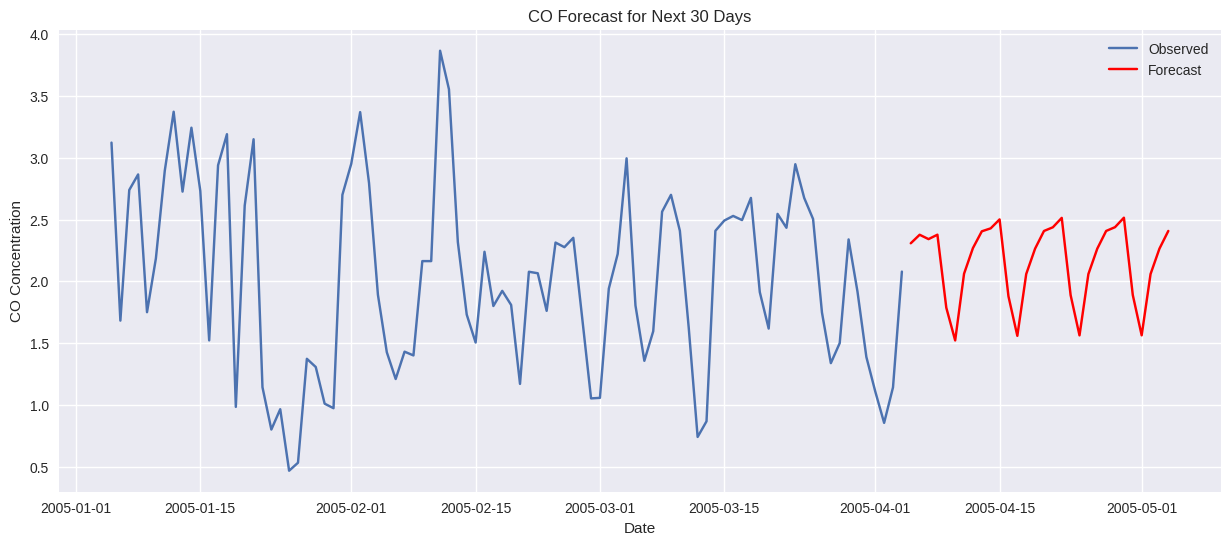

(2005-04-05    2.307935
 2005-04-06    2.376897
 2005-04-07    2.341618
 2005-04-08    2.377345
 2005-04-09    1.786654
 2005-04-10    1.521428
 2005-04-11    2.061461
 2005-04-12    2.268969
 2005-04-13    2.404788
 2005-04-14    2.428657
 2005-04-15    2.501086
 2005-04-16    1.878697
 2005-04-17    1.558575
 2005-04-18    2.058942
 2005-04-19    2.264594
 2005-04-20    2.407407
 2005-04-21    2.437394
 2005-04-22    2.513610
 2005-04-23    1.888026
 2005-04-24    1.562336
 2005-04-25    2.058676
 2005-04-26    2.264145
 2005-04-27    2.407671
 2005-04-28    2.438281
 2005-04-29    2.514883
 2005-04-30    1.888975
 2005-05-01    1.562719
 2005-05-02    2.058649
 2005-05-03    2.264099
 2005-05-04    2.407698
 Freq: D, Name: predicted_mean, dtype: float64,
 0.706847015027749)

In [ ]:
# # Adjust SARIMA model parameters for daily data
# seasonal_order = (1, 1, 1, 7)
# # assuming weekly seasonality
# order=(1,0,1)
# # Adjust the forecast period for daily data
# forecast_period = 30  # 30 days

# # Forecasting for CO
# co_forecast, co_mse = forecast_sarima(daily_data['CO(GT)'], order, seasonal_order, forecast_period)

# # Adjust the plotting for daily data
# plt.figure(figsize=(15, 6))
# plt.plot(daily_data['CO(GT)'][-90:], label='Observed')  # last 90 days (3 months)
# plt.plot(co_forecast, label='Forecast', color='red')
# plt.title('CO Forecast for Next 30 Days')
# plt.xlabel('Date')
# plt.ylabel('CO Concentration')
# plt.legend()
# plt.show()

# co_forecast, co_mse


TCN Univariate

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming daily_data['CO(GT)'] is your time series data

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data['CO(GT)'].values.reshape(-1, 1))

# Function to create a dataset for supervised learning
def create_dataset(series, time_step):
    X, Y = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i:(i + time_step), 0]
        X.append(a)
        Y.append(series[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100  # number of time steps to look back for prediction (can be tuned)
X, y = create_dataset(scaled_data, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size], X[train_size:len(X)]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features]
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)

In [42]:
# Install the keras-tcn package
!pip install keras-tcn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

# TCN model architecture
model = Sequential([
    TCN(input_shape=(time_step, 1),
        nb_filters=64,
        kernel_size=2,
        nb_stacks=1,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        use_skip_connections=True),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.4 MB/s eta 0:00:00
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 64)                74624     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 74689 (291.75 KB)
Trainable params: 74689 (291.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Fit the model
history = model.fit(train_X, train_y, epochs=100, validation_data=(test_X, test_y), batch_size=32)


Epoch 1/100
7/7 [==============================] - 23s 123ms/step - loss: 7.9323 - val_loss: 1.0917
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 1.3727 - val_loss: 0.6961
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5141 - val_loss: 0.4828
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.2581 - val_loss: 0.3467
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.1571 - val_loss: 0.2653
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1086 - val_loss: 0.1942
Epoch 7/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0819 - val_loss: 0.1747
Epoch 8/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0683 - val_loss: 0.1346
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 0.0576 - val_loss: 0.1263
Epoch 10/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0600 - val_loss: 0.1024
Epoch 11/100
7/7 

In [44]:
# Making predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


3/3 [==============================] - 0s 4ms/step


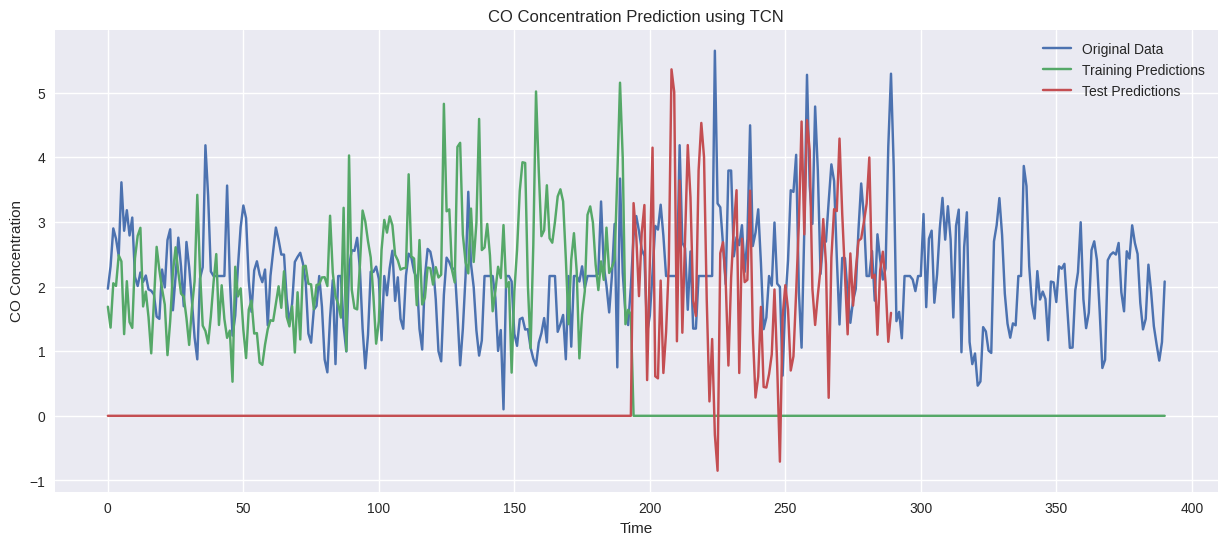

In [45]:
# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(np.concatenate((train_predict, np.zeros(shape=(len(scaled_data) - len(train_predict), 1))), axis=0), label='Training Predictions')
plt.plot(np.concatenate((np.zeros(shape=(len(train_predict), 1)), test_predict), axis=0), label='Test Predictions')
plt.title('CO Concentration Prediction using TCN')
plt.xlabel('Time')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()


In [46]:
# Function to generate predictions for multiple steps ahead
def forecast_multi_step(model, start_data, steps):
    input_data = start_data
    predictions = []

    for _ in range(steps):
        # Reshape data for the model (1, time_step, 1)
        input_data_reshaped = input_data.reshape((1, time_step, 1))

        # Predict the next step
        prediction = model.predict(input_data_reshaped)

        # Append the prediction
        predictions.append(prediction[0, 0])

        # Update the input data to include the prediction
        input_data = np.append(input_data[1:], prediction)

    return np.array(predictions)

# Prepare the last part of your data as the starting point
last_known_data = scaled_data[-time_step:]

# Forecast for the next 30 days
forecast_steps = 30
forecast = forecast_multi_step(model, last_known_data, forecast_steps)

# Inverse transform the forecast to original scale
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))


1/1 [==============================] - 0s 18ms/step


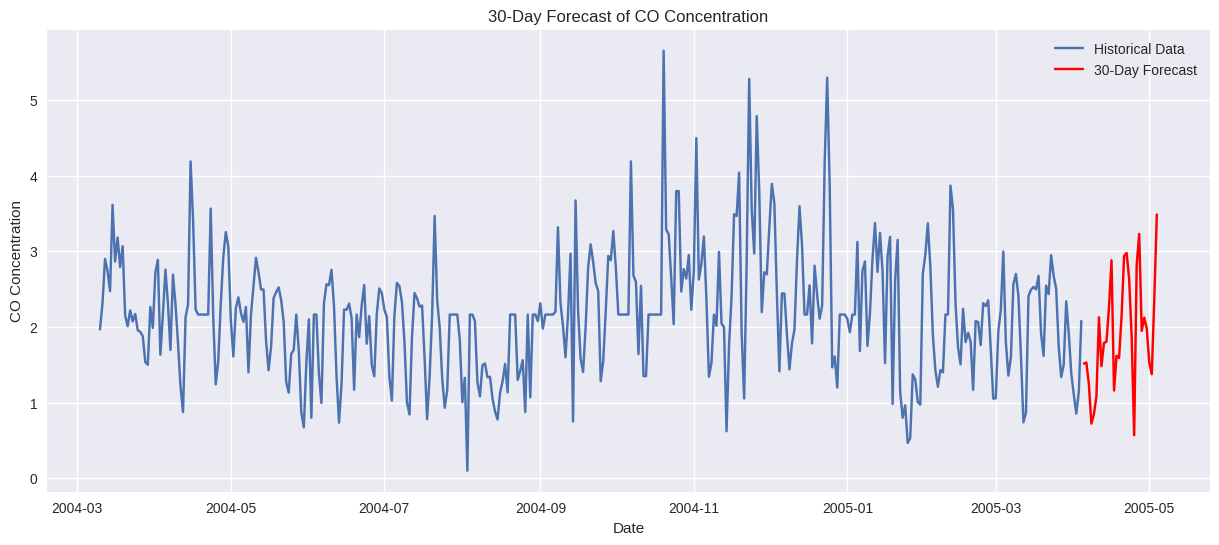

In [47]:
# Create a time index for the forecast
last_date = daily_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, closed='right')

# Plotting the forecast
plt.figure(figsize=(15, 6))
plt.plot(daily_data['CO(GT)'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='30-Day Forecast', color='red')
plt.title('30-Day Forecast of CO Concentration')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()


In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual values for comparison
train_y_inv = scaler.inverse_transform(train_y.reshape(-1, 1))
test_y_inv = scaler.inverse_transform(test_y.reshape(-1, 1))

# Calculate metrics
train_mse = mean_squared_error(train_y_inv, train_predict)
train_r2 = r2_score(train_y_inv, train_predict)
train_mae = mean_absolute_error(train_y_inv, train_predict)

test_mse = mean_squared_error(test_y_inv, test_predict)
test_r2 = r2_score(test_y_inv, test_predict)
test_mae = mean_absolute_error(test_y_inv, test_predict)

# Print out the metrics
print(f"Training Metrics:\nMSE: {train_mse}\nR2: {train_r2}\nMAE: {train_mae}\n")
print(f"Test Metrics:\nMSE: {test_mse}\nR2: {test_r2}\nMAE: {test_mae}")


Training Metrics:
MSE: 0.0895941376370224
R2: 0.8868091175326369
MAE: 0.22286364974068085

Test Metrics:
MSE: 1.984481810037024
R2: -2.633040352568988
MAE: 1.1120801612856792


TCN univariate(C6h6)

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming daily_data contains the columns 'C6H6(GT)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
# Replace 'daily_data' with the actual name of your DataFrame if it's different

# Normalize data for C6H6(GT)
scaler_c6h6 = MinMaxScaler(feature_range=(0, 1))
scaled_data_c6h6 = scaler_c6h6.fit_transform(daily_data['C6H6(GT)'].values.reshape(-1, 1))

# Function to create a dataset for supervised learning
def create_dataset(series, time_step):
    X, Y = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i:(i + time_step), 0]
        X.append(a)
        Y.append(series[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100  # number of time steps to look back for prediction (can be tuned)

# Create datasets for C6H6(GT)
X_c6h6, y_c6h6 = create_dataset(scaled_data_c6h6, time_step)

# Split into train and test sets for C6H6(GT)
train_size_c6h6 = int(len(X_c6h6) * 0.67)
test_size_c6h6 = len(X_c6h6) - train_size_c6h6
train_X_c6h6, test_X_c6h6 = X_c6h6[0:train_size_c6h6], X_c6h6[train_size_c6h6:len(X_c6h6)]
train_y_c6h6, test_y_c6h6 = y_c6h6[0:train_size_c6h6], y_c6h6[train_size_c6h6:len(y_c6h6)]

# Reshape input to be [samples, time steps, features]
train_X_c6h6 = train_X_c6h6.reshape(train_X_c6h6.shape[0], train_X_c6h6.shape[1], 1)
test_X_c6h6 = test_X_c6h6.reshape(test_X_c6h6.shape[0], test_X_c6h6.shape[1], 1)


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN

# Assuming time_step is defined as before

# TCN model architecture for C6H6(GT)
model_c6h6 = Sequential([
    TCN(input_shape=(time_step, 1),
        nb_filters=64,
        kernel_size=2,
        nb_stacks=1,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        use_skip_connections=True),
    Dense(1)
])

model_c6h6.compile(optimizer='adam', loss='mean_squared_error')

# Model summary for C6H6(GT)
model_c6h6.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_4 (TCN)                 (None, 64)                74624     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74689 (291.75 KB)
Trainable params: 74689 (291.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
# Fit the model
history = model_c6h6.fit(train_X_c6h6, train_y_c6h6, epochs=100, validation_data=(test_X_c6h6, test_y_c6h6), batch_size=32)

Epoch 1/100
7/7 [==============================] - 5s 76ms/step - loss: 8.7474 - val_loss: 0.4761
Epoch 2/100
7/7 [==============================] - 0s 16ms/step - loss: 1.0093 - val_loss: 0.2648
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.4305 - val_loss: 0.1767
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.2696 - val_loss: 0.1836
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.1304 - val_loss: 0.1185
Epoch 6/100
7/7 [==============================] - 0s 20ms/step - loss: 0.1196 - val_loss: 0.0884
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0842 - val_loss: 0.0553
Epoch 8/100
7/7 [==============================] - 0s 17ms/step - loss: 0.0556 - val_loss: 0.0529
Epoch 9/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0415 - val_loss: 0.0622
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0341 - val_loss: 0.0509
Epoch 11/100
7/7 [=

In [73]:
# Making predictions for C6H6(GT)
train_predict_c6h6 = model_c6h6.predict(train_X_c6h6)
test_predict_c6h6 = model_c6h6.predict(test_X_c6h6)

# Inverse transform predictions for C6H6(GT)
train_predict_c6h6 = scaler_c6h6.inverse_transform(train_predict_c6h6)
test_predict_c6h6 = scaler_c6h6.inverse_transform(test_predict_c6h6)


3/3 [==============================] - 0s 5ms/step


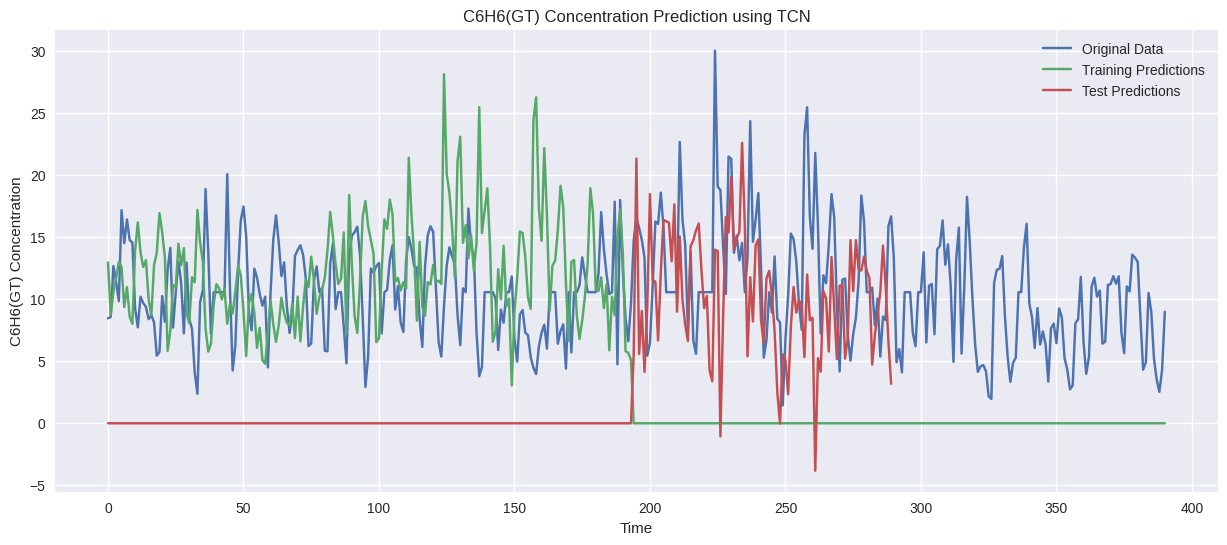

In [74]:
plt.figure(figsize=(15, 6))
plt.plot(scaler_c6h6.inverse_transform(scaled_data_c6h6), label='Original Data')
plt.plot(np.concatenate((train_predict_c6h6, np.zeros(shape=(len(scaled_data_c6h6) - len(train_predict_c6h6), 1))), axis=0), label='Training Predictions')
plt.plot(np.concatenate((np.zeros(shape=(len(train_predict_c6h6), 1)), test_predict_c6h6), axis=0), label='Test Predictions')
plt.title('C6H6(GT) Concentration Prediction using TCN')
plt.xlabel('Time')
plt.ylabel('C6H6(GT) Concentration')
plt.legend()
plt.show()


In [75]:
# Function to generate predictions for multiple steps ahead for C6H6(GT)
def forecast_multi_step_c6h6(model_c6h6, start_data_c6h6, steps):
    input_data_c6h6 = start_data_c6h6
    predictions_c6h6 = []

    for _ in range(steps):
        # Reshape data for the model (1, time_step, 1)
        input_data_reshaped_c6h6 = input_data_c6h6.reshape((1, time_step, 1))

        # Predict the next step
        prediction_c6h6 = model_c6h6.predict(input_data_reshaped_c6h6)

        # Append the prediction
        predictions_c6h6.append(prediction_c6h6[0, 0])

        # Update the input data to include the prediction
        input_data_c6h6 = np.append(input_data_c6h6[1:], prediction_c6h6)

    return np.array(predictions_c6h6)

# Prepare the last part of your C6H6(GT) data as the starting point
last_known_data_c6h6 = scaled_data_c6h6[-time_step:]

# Forecast for the next 30 days for C6H6(GT)
forecast_steps_c6h6 = 30
forecast_c6h6 = forecast_multi_step_c6h6(model_c6h6, last_known_data_c6h6, forecast_steps_c6h6)

# Inverse transform the forecast to the original scale for C6H6(GT)
forecast_c6h6 = scaler_c6h6.inverse_transform(forecast_c6h6.reshape(-1, 1))



1/1 [==============================] - 0s 25ms/step


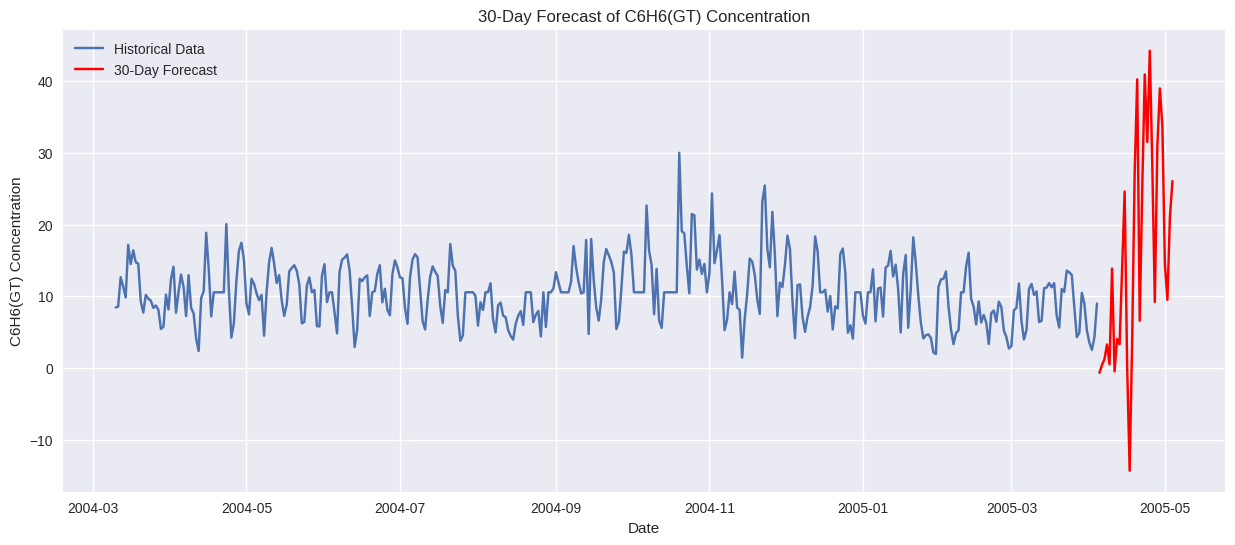

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a time index for the C6H6(GT) forecast
last_date_c6h6 = daily_data.index[-1]
forecast_dates_c6h6 = pd.date_range(start=last_date_c6h6, periods=forecast_steps_c6h6 + 1, closed='right')

# Plotting the C6H6(GT) forecast
plt.figure(figsize=(15, 6))
plt.plot(daily_data['C6H6(GT)'], label='Historical Data')
plt.plot(forecast_dates_c6h6, forecast_c6h6, label='30-Day Forecast', color='red')
plt.title('30-Day Forecast of C6H6(GT) Concentration')
plt.xlabel('Date')
plt.ylabel('C6H6(GT) Concentration')
plt.legend()
plt.show()


In [107]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual values for C6H6(GT) comparison
train_y_c6h6_inv = scaler_c6h6.inverse_transform(train_y_c6h6.reshape(-1, 1))
test_y_c6h6_inv = scaler_c6h6.inverse_transform(test_y_c6h6.reshape(-1, 1))

# Inverse transform the predicted values for C6H6(GT) comparison
train_predict_c6h6_inv = scaler_c6h6.inverse_transform(train_predict_c6h6)
test_predict_c6h6_inv = scaler_c6h6.inverse_transform(test_predict_c6h6)

# Calculate metrics for C6H6(GT)
train_mse_c6h6 = mean_squared_error(train_y_c6h6_inv, train_predict_c6h6_inv)
train_r2_c6h6 = r2_score(train_y_c6h6_inv, train_predict_c6h6_inv)
train_mae_c6h6 = mean_absolute_error(train_y_c6h6_inv, train_predict_c6h6_inv)

test_mse_c6h6 = mean_squared_error(test_y_c6h6_inv, test_predict_c6h6_inv)
test_r2_c6h6 = r2_score(test_y_c6h6_inv, test_predict_c6h6_inv)
test_mae_c6h6 = mean_absolute_error(test_y_c6h6_inv, test_predict_c6h6_inv)

# Print out the metrics for C6H6(GT)
print(f"Training Metrics for C6H6(GT):\nMSE: {train_mse_c6h6}\nR2: {train_r2_c6h6}\nMAE: {train_mae_c6h6}\n")
print(f"Test Metrics for C6H6(GT):\nMSE: {test_mse_c6h6}\nR2: {test_r2_c6h6}\nMAE: {test_mae_c6h6}")


Training Metrics for C6H6(GT):
MSE: 133891.7053276711
R2: -6535.231614413108
MAE: 346.11531124467894

Test Metrics for C6H6(GT):
MSE: 84343.38380539093
R2: -6040.975521869385
MAE: 250.63352036904766


TCN univariate(PT08.S3(NOx))

In [113]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming daily_data contains the columns 'PT08.S3(NOx)', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
# Replace 'daily_data' with the actual name of your DataFrame if it's different

# Normalize data for PT08.S3(NOx)
scaler_pt08_s3_nox = MinMaxScaler(feature_range=(0, 1))
scaled_data_pt08_s3_nox = scaler_pt08_s3_nox.fit_transform(daily_data['PT08.S3(NOx)'].values.reshape(-1, 1))

# Function to create a dataset for supervised learning
def create_dataset(series, time_step):
    X, Y = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i:(i + time_step), 0]
        X.append(a)
        Y.append(series[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100  # number of time steps to look back for prediction (can be tuned)

# Create datasets for PT08.S3(NOx)
X_pt08_s3_nox, y_pt08_s3_nox = create_dataset(scaled_data_pt08_s3_nox, time_step)

# Split into train and test sets for PT08.S3(NOx)
train_size_pt08_s3_nox = int(len(X_pt08_s3_nox) * 0.67)
test_size_pt08_s3_nox = len(X_pt08_s3_nox) - train_size_pt08_s3_nox
train_X_pt08_s3_nox, test_X_pt08_s3_nox = X_pt08_s3_nox[0:train_size_pt08_s3_nox], X_pt08_s3_nox[train_size_pt08_s3_nox:len(X_pt08_s3_nox)]
train_y_pt08_s3_nox, test_y_pt08_s3_nox = y_pt08_s3_nox[0:train_size_pt08_s3_nox], y_pt08_s3_nox[train_size_pt08_s3_nox:len(y_pt08_s3_nox)]

# Reshape input to be [samples, time steps, features]
train_X_pt08_s3_nox = train_X_pt08_s3_nox.reshape(train_X_pt08_s3_nox.shape[0], train_X_pt08_s3_nox.shape[1], 1)
test_X_pt08_s3_nox = test_X_pt08_s3_nox.reshape(test_X_pt08_s3_nox.shape[0], test_X_pt08_s3_nox.shape[1], 1)


In [114]:
# TCN model architecture for PT08.S3(NOx)
model_pt08_s3_nox = Sequential([
    TCN(input_shape=(time_step, 1),
        nb_filters=64,
        kernel_size=2,
        nb_stacks=1,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        use_skip_connections=True),
    Dense(1)
])

model_pt08_s3_nox.compile(optimizer='adam', loss='mean_squared_error')

# Model summary for PT08.S3(NOx)
model_pt08_s3_nox.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_9 (TCN)                 (None, 64)                74624     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74689 (291.75 KB)
Trainable params: 74689 (291.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
# Fit the model for PT08.S3(NOx)
history_pt08_s3_nox = model_pt08_s3_nox.fit(train_X_pt08_s3_nox, train_y_pt08_s3_nox, epochs=100, validation_data=(test_X_pt08_s3_nox, test_y_pt08_s3_nox), batch_size=32)


Epoch 1/100
7/7 [==============================] - 0s 49ms/step - loss: 0.0032 - val_loss: 0.0259
Epoch 2/100
7/7 [==============================] - 0s 44ms/step - loss: 0.0026 - val_loss: 0.0273
Epoch 3/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0031 - val_loss: 0.0279
Epoch 4/100
7/7 [==============================] - 0s 42ms/step - loss: 0.0031 - val_loss: 0.0246
Epoch 5/100
7/7 [==============================] - 0s 26ms/step - loss: 0.0012 - val_loss: 0.0233
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0012 - val_loss: 0.0229
Epoch 7/100
7/7 [==============================] - 0s 24ms/step - loss: 0.0010 - val_loss: 0.0239
Epoch 8/100
7/7 [==============================] - 0s 25ms/step - loss: 9.6674e-04 - val_loss: 0.0245
Epoch 9/100
7/7 [==============================] - 0s 26ms/step - loss: 8.4646e-04 - val_loss: 0.0256
Epoch 10/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0013 - val_loss: 0.0243
Epoch 11/10

In [122]:
# Making predictions for PT08.S3(NOx)
train_predict_pt08_s3_nox = model_pt08_s3_nox.predict(train_X_pt08_s3_nox)
test_predict_pt08_s3_nox = model_pt08_s3_nox.predict(test_X_pt08_s3_nox)

# Inverse transform predictions for PT08.S3(NOx)
train_predict_pt08_s3_nox_inv = scaler_pt08_s3_nox.inverse_transform(train_predict_pt08_s3_nox)
test_predict_pt08_s3_nox_inv = scaler_pt08_s3_nox.inverse_transform(test_predict_pt08_s3_nox)


3/3 [==============================] - 0s 8ms/step


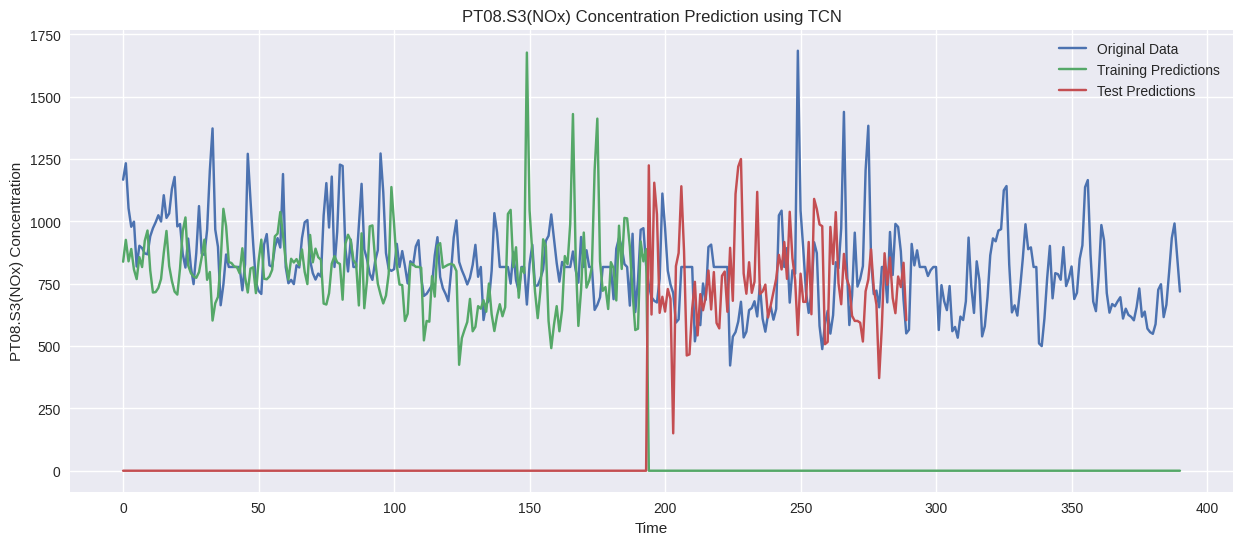

In [123]:
plt.figure(figsize=(15, 6))
plt.plot(scaler_pt08_s3_nox.inverse_transform(scaled_data_pt08_s3_nox), label='Original Data')
plt.plot(np.concatenate((train_predict_pt08_s3_nox_inv, np.zeros(shape=(len(scaled_data_pt08_s3_nox) - len(train_predict_pt08_s3_nox_inv), 1))), axis=0), label='Training Predictions')
plt.plot(np.concatenate((np.zeros(shape=(len(train_predict_pt08_s3_nox_inv), 1)), test_predict_pt08_s3_nox_inv), axis=0), label='Test Predictions')
plt.title('PT08.S3(NOx) Concentration Prediction using TCN')
plt.xlabel('Time')
plt.ylabel('PT08.S3(NOx) Concentration')
plt.legend()
plt.show()


In [124]:
# Function to generate predictions for multiple steps ahead for PT08.S3(NOx)
def forecast_multi_step_pt08_s3_nox(model_pt08_s3_nox, start_data_pt08_s3_nox, steps):
    input_data_pt08_s3_nox = start_data_pt08_s3_nox
    predictions_pt08_s3_nox = []

    for _ in range(steps):
        # Reshape data for the model (1, time_step, 1)
        input_data_reshaped_pt08_s3_nox = input_data_pt08_s3_nox.reshape((1, time_step, 1))

        # Predict the next step
        prediction_pt08_s3_nox = model_pt08_s3_nox.predict(input_data_reshaped_pt08_s3_nox)

        # Append the prediction
        predictions_pt08_s3_nox.append(prediction_pt08_s3_nox[0, 0])

        # Update the input data to include the prediction
        input_data_pt08_s3_nox = np.append(input_data_pt08_s3_nox[1:], prediction_pt08_s3_nox)

    return np.array(predictions_pt08_s3_nox)

# Prepare the last part of your PT08.S3(NOx) data as the starting point
last_known_data_pt08_s3_nox = scaled_data_pt08_s3_nox[-time_step:]

# Forecast for the next 30 days for PT08.S3(NOx)
forecast_steps_pt08_s3_nox = 30
forecast_pt08_s3_nox = forecast_multi_step_pt08_s3_nox(model_pt08_s3_nox, last_known_data_pt08_s3_nox, forecast_steps_pt08_s3_nox)

# Inverse transform the forecast to the original scale for PT08.S3(NOx)
forecast_pt08_s3_nox = scaler_pt08_s3_nox.inverse_transform(forecast_pt08_s3_nox.reshape(-1, 1))


1/1 [==============================] - 0s 22ms/step


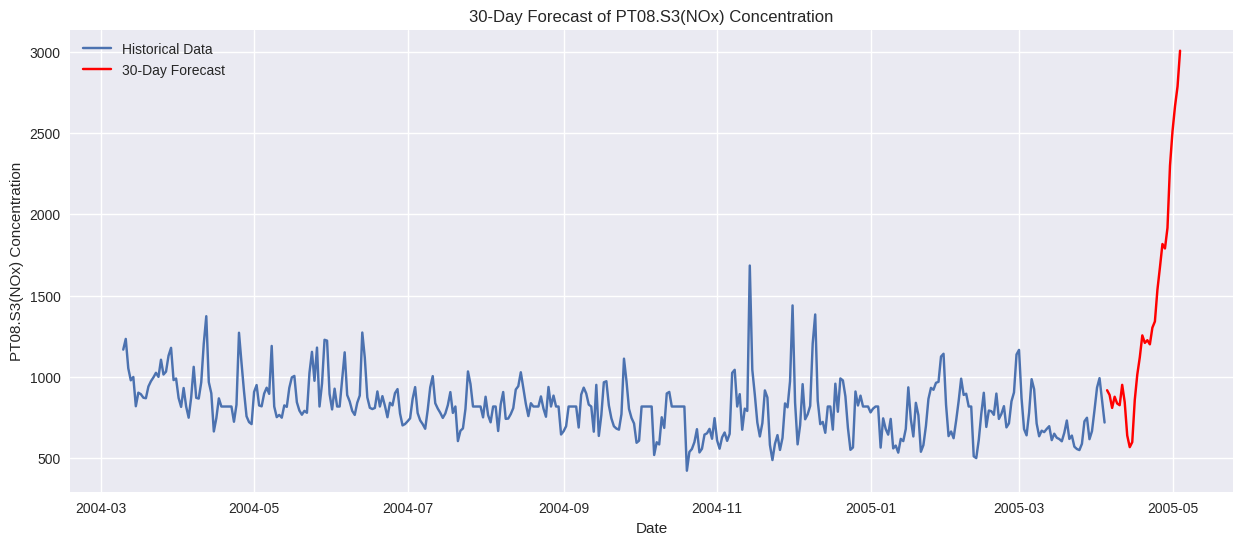

In [125]:
# Create a time index for the PT08.S3(NOx) forecast
last_date_pt08_s3_nox = daily_data.index[-1]
forecast_dates_pt08_s3_nox = pd.date_range(start=last_date_pt08_s3_nox, periods=forecast_steps_pt08_s3_nox + 1, closed='right')

# Plotting the PT08.S3(NOx) forecast
plt.figure(figsize=(15, 6))
plt.plot(daily_data['PT08.S3(NOx)'], label='Historical Data')
plt.plot(forecast_dates_pt08_s3_nox, forecast_pt08_s3_nox, label='30-Day Forecast', color='red')
plt.title('30-Day Forecast of PT08.S3(NOx) Concentration')
plt.xlabel('Date')
plt.ylabel('PT08.S3(NOx) Concentration')
plt.legend()
plt.show()


In [126]:
# Inverse transform the actual values for PT08.S3(NOx) comparison
train_y_pt08_s3_nox_inv = scaler_pt08_s3_nox.inverse_transform(train_y_pt08_s3_nox.reshape(-1, 1))
test_y_pt08_s3_nox_inv = scaler_pt08_s3_nox.inverse_transform(test_y_pt08_s3_nox.reshape(-1, 1))

# Inverse transform the predicted values for PT08.S3(NOx) comparison
train_predict_pt08_s3_nox_inv = scaler_pt08_s3_nox.inverse_transform(train_predict_pt08_s3_nox)
test_predict_pt08_s3_nox_inv = scaler_pt08_s3_nox.inverse_transform(test_predict_pt08_s3_nox)

# Calculate metrics for PT08.S3(NOx)
train_mse_pt08_s3_nox = mean_squared_error(train_y_pt08_s3_nox_inv, train_predict_pt08_s3_nox_inv)
train_r2_pt08_s3_nox = r2_score(train_y_pt08_s3_nox_inv, train_predict_pt08_s3_nox_inv)
train_mae_pt08_s3_nox = mean_absolute_error(train_y_pt08_s3_nox_inv, train_predict_pt08_s3_nox_inv)

test_mse_pt08_s3_nox = mean_squared_error(test_y_pt08_s3_nox_inv, test_predict_pt08_s3_nox_inv)
test_r2_pt08_s3_nox = r2_score(test_y_pt08_s3_nox_inv, test_predict_pt08_s3_nox_inv)
test_mae_pt08_s3_nox = mean_absolute_error(test_y_pt08_s3_nox_inv, test_predict_pt08_s3_nox_inv)

# Print out the metrics for PT08.S3(NOx)
print(f"Training Metrics for PT08.S3(NOx):\nMSE: {train_mse_pt08_s3_nox}\nR2: {train_r2_pt08_s3_nox}\nMAE: {train_mae_pt08_s3_nox}\n")
print(f"Test Metrics for PT08.S3(NOx):\nMSE: {test_mse_pt08_s3_nox}\nR2: {test_r2_pt08_s3_nox}\nMAE: {test_mae_pt08_s3_nox}")


Training Metrics for PT08.S3(NOx):
MSE: 297.1744990394509
R2: 0.987708822428408
MAE: 14.012855328367081

Test Metrics for PT08.S3(NOx):
MSE: 39068.977652555805
R2: -0.7921719142132526
MAE: 149.4958684995338


TCN Multivariate

In [211]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tcn import TCN

# Assuming daily_data is your DataFrame with the mentioned columns
features = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
            'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Selecting the features
multivariate_data = daily_data[features]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(multivariate_data)

# Function to create a dataset for supervised learning for multivariate data
def create_multivariate_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        Y.append(data[i + time_step, 0])  # Assuming the first column 'CO(GT)' is the target variable
    return np.array(X), np.array(Y)

time_step = 100  # number of time steps to look back for prediction (can be tuned)
X, y = create_multivariate_dataset(scaled_data, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.67)
train_X, test_X = X[0:train_size], X[train_size:len(X)]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

# Reshape input for TCN model
# In multivariate case, the last dimension is the number of features
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], len(features))
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], len(features))

# Define the TCN model architecture with dropout
model = Sequential([
    TCN(input_shape=(time_step, len(features)),
        nb_filters=64,
        kernel_size=2,
        nb_stacks=1,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        use_skip_connections=True,
        dropout_rate=0.2),  # Adjust dropout rate as needed
    Dropout(0.2),  # Additional dropout layer, if needed
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary to verify the architecture
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with the EarlyStopping callback
history = model.fit(
    train_X, train_y,
    epochs=100,
    validation_data=(test_X, test_y),
    batch_size=32,
    callbacks=[early_stopping]  # Include the callback for early stopping
)


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_14 (TCN)                (None, 64)                76736     
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 65        
                                                                 
Total params: 76801 (300.00 KB)
Trainable params: 76801 (300.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 5s 69ms/step - loss: 92.9569 - val_loss: 2.1855
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 16.2997 - val_loss: 2.5978
Epoch 3/100
7/7 [==============================] - 0s 19ms/step - loss: 10.3235 -

In [147]:
# Generate predictions for the training and test sets
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Inverse transform predictions
# As before, we construct the full sets for inverse transformation
train_full = np.zeros((len(train_predict), len(features)))
test_full = np.zeros((len(test_predict), len(features)))

train_full[:, 0] = train_predict[:, 0]
test_full[:, 0] = test_predict[:, 0]

train_predict_original = scaler.inverse_transform(train_full)[:, 0]
test_predict_original = scaler.inverse_transform(test_full)[:, 0]

# Combine training and test predictions for plotting
combined_predict = np.concatenate((train_predict_original, test_predict_original))

3/3 [==============================] - 0s 5ms/step


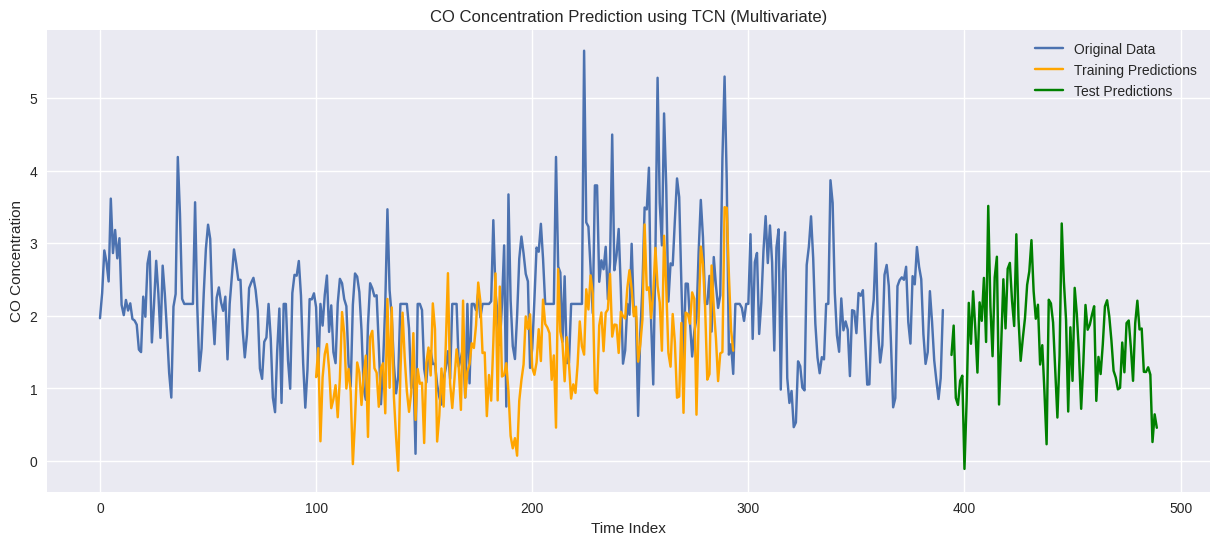

In [142]:
plt.figure(figsize=(15, 6))

# Plot original data
plt.plot(daily_data['CO(GT)'].values, label='Original Data')

# Plot training predictions
# Align predictions with the original data index
train_pred_index = range(time_step, len(train_predict_original) + time_step)
plt.plot(train_pred_index, train_predict_original, label='Training Predictions', color='orange')

# Plot test predictions
# Align predictions with the original data index
test_pred_index = range(len(train_predict_original) + (2 * time_step), len(combined_predict) + (2 * time_step))
plt.plot(test_pred_index, test_predict_original, label='Test Predictions', color='green')

plt.title('CO Concentration Prediction using TCN (Multivariate)')
plt.xlabel('Time Index')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()


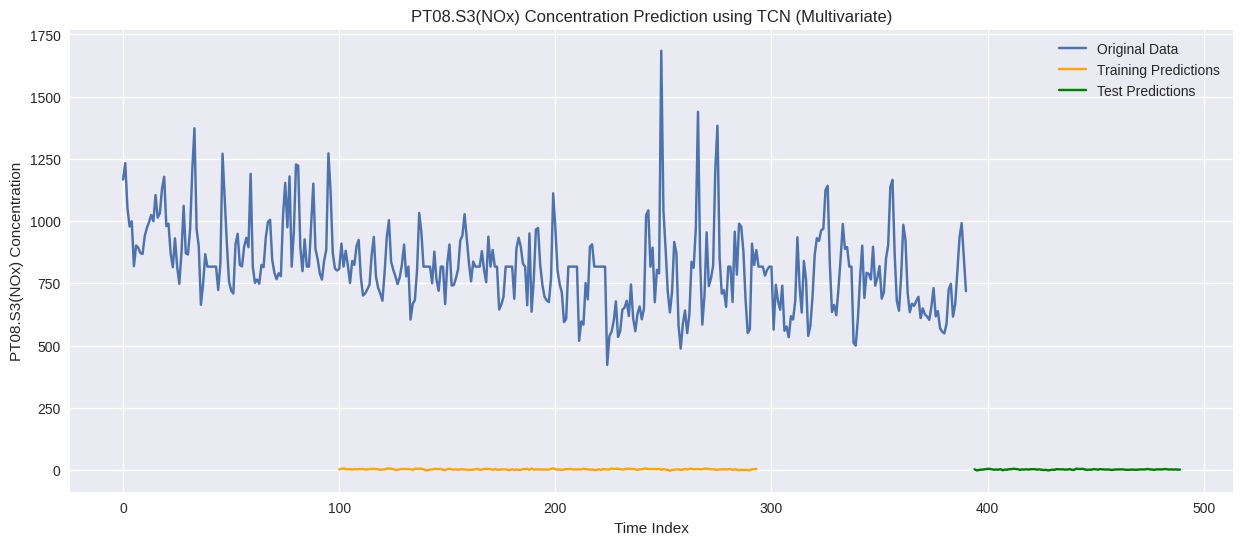

In [148]:
#PT08.S3(NOx)
plt.figure(figsize=(15, 6))

# Plot original data
plt.plot(daily_data['PT08.S3(NOx)'].values, label='Original Data')

# Plot training predictions
# Align predictions with the original data index
train_pred_index = range(time_step, len(train_predict_original) + time_step)
plt.plot(train_pred_index, train_predict_original, label='Training Predictions', color='orange')

# Plot test predictions
# Align predictions with the original data index
test_pred_index = range(len(train_predict_original) + (2 * time_step), len(combined_predict) + (2 * time_step))
plt.plot(test_pred_index, test_predict_original, label='Test Predictions', color='green')

plt.title('PT08.S3(NOx) Concentration Prediction using TCN (Multivariate)')
plt.xlabel('Time Index')
plt.ylabel('PT08.S3(NOx) Concentration')
plt.legend()
plt.show()


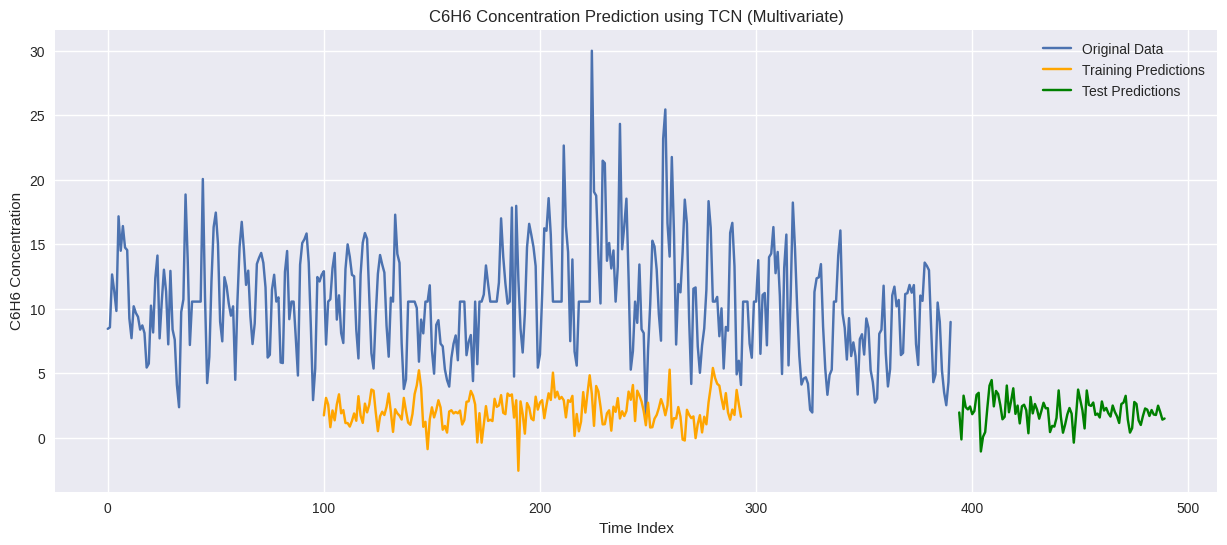

In [129]:
plt.figure(figsize=(15, 6))

# Plot original data
plt.plot(daily_data['C6H6(GT)'].values, label='Original Data')

# Plot training predictions
# Align predictions with the original data index
train_pred_index = range(time_step, len(train_predict_original) + time_step)
plt.plot(train_pred_index, train_predict_original, label='Training Predictions', color='orange')

# Plot test predictions
# Align predictions with the original data index
test_pred_index = range(len(train_predict_original) + (2 * time_step), len(combined_predict) + (2 * time_step))
plt.plot(test_pred_index, test_predict_original, label='Test Predictions', color='green')

plt.title('C6H6 Concentration Prediction using TCN (Multivariate)')
plt.xlabel('Time Index')
plt.ylabel('C6H6 Concentration')
plt.legend()
plt.show()

In [149]:
def forecast_multivariate(model, start_data, n_steps, n_features):
    input_data = start_data.copy()
    output = []

    for _ in range(n_steps):
        # Reshape data to fit model input
        input_data_reshaped = input_data.reshape((1, time_step, n_features))

        # Get the next prediction
        pred = model.predict(input_data_reshaped)

        # Add prediction to output
        output.append(pred[0, 0])

        # Shift the input_data by one time step
        input_data = np.roll(input_data, -n_features, axis=0)

        # Update only the target feature (first feature) in the last time step with the new prediction
        input_data[-1, 0] = pred[0, 0]

    return np.array(output)

# Prepare the last known data as input
last_input_data = scaled_data[-time_step:]

# Forecast for 30 days
n_future_steps = 30
forecast = forecast_multivariate(model, last_input_data, n_future_steps, len(features))



1/1 [==============================] - 0s 21ms/step


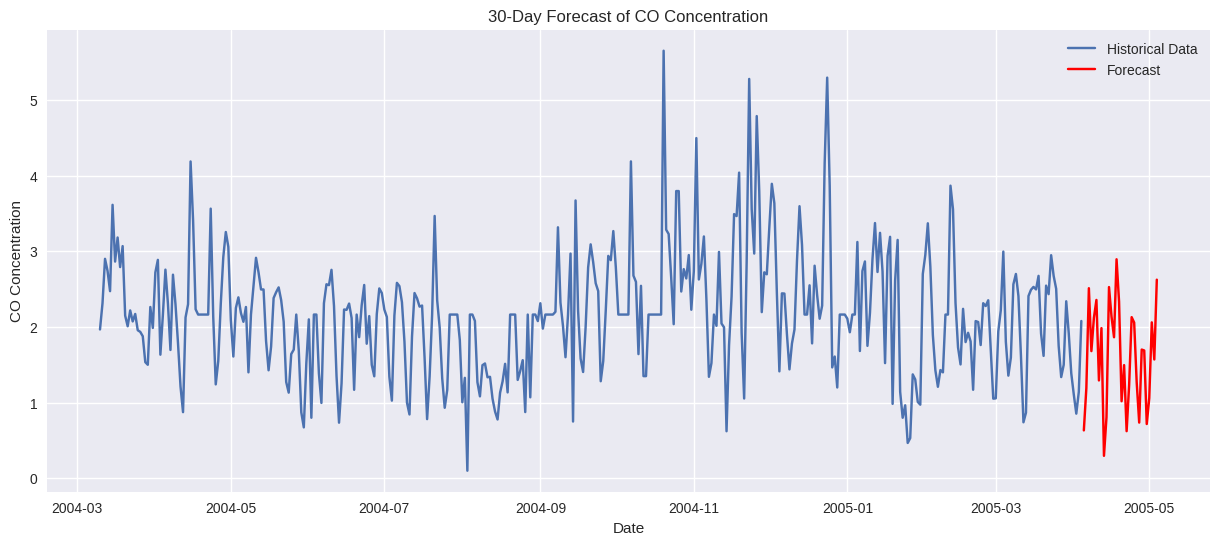

In [144]:
# Rescale the forecast back to the original scale
# Note: We need to construct the full predicted set to inverse transform
# This includes the features for which we didn't make predictions

# Placeholder for the full set of predictions
full_forecast = np.zeros((n_future_steps, len(features)))

# Fill in the predictions for the target variable
full_forecast[:, 0] = forecast

# Inverse transform
forecast_original_scale = scaler.inverse_transform(full_forecast)[:, 0]

# Generate the corresponding dates for the forecast
forecast_dates = pd.date_range(start=daily_data.index[-1], periods=n_future_steps+1, closed='right')

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(daily_data['CO(GT)'], label='Historical Data')
plt.plot(forecast_dates, forecast_original_scale, label='Forecast', color='red')
plt.title('30-Day Forecast of CO Concentration')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()


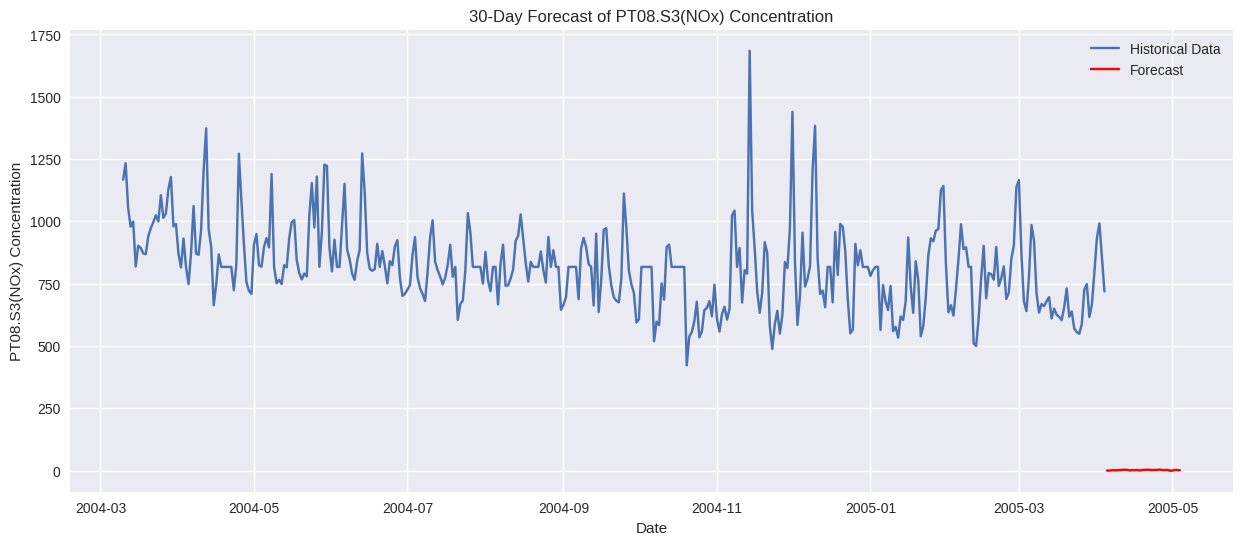

In [150]:
# Placeholder for the full set of predictions
full_forecast = np.zeros((n_future_steps, len(features)))

# Fill in the predictions for the target variable
full_forecast[:, 0] = forecast

# Inverse transform
forecast_original_scale = scaler.inverse_transform(full_forecast)[:, 0]

# Generate the corresponding dates for the forecast
forecast_dates = pd.date_range(start=daily_data.index[-1], periods=n_future_steps+1, closed='right')

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(daily_data['PT08.S3(NOx)'], label='Historical Data')
plt.plot(forecast_dates, forecast_original_scale, label='Forecast', color='red')
plt.title('30-Day Forecast of PT08.S3(NOx) Concentration')
plt.xlabel('Date')
plt.ylabel('PT08.S3(NOx) Concentration')
plt.legend()
plt.show()

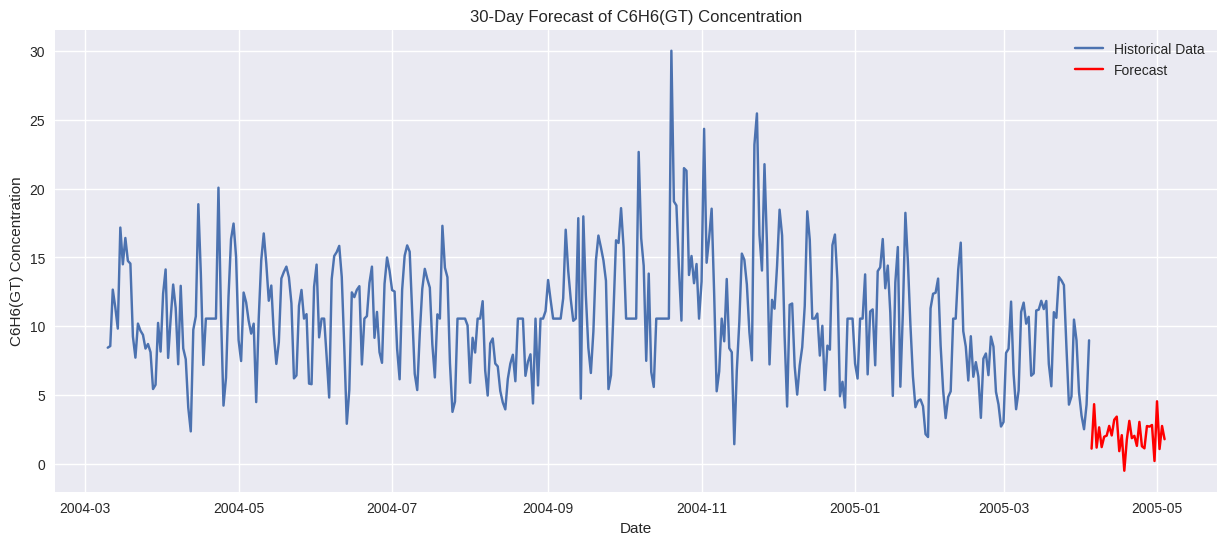

In [131]:
# Rescale the forecast back to the original scale
# Note: We need to construct the full predicted set to inverse transform
# This includes the features for which we didn't make predictions

# Placeholder for the full set of predictions
full_forecast = np.zeros((n_future_steps, len(features)))

# Fill in the predictions for the target variable
full_forecast[:, 0] = forecast

# Inverse transform
forecast_original_scale = scaler.inverse_transform(full_forecast)[:, 0]

# Generate the corresponding dates for the forecast
forecast_dates = pd.date_range(start=daily_data.index[-1], periods=n_future_steps+1, closed='right')

# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(daily_data['C6H6(GT)'], label='Historical Data')
plt.plot(forecast_dates, forecast_original_scale, label='Forecast', color='red')
plt.title('30-Day Forecast of C6H6(GT) Concentration')
plt.xlabel('Date')
plt.ylabel('C6H6(GT) Concentration')
plt.legend()
plt.show()


In [145]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual target values if they were scaled
# This assumes 'train_y' and 'test_y' are the true values in scaled form
# If 'train_y' and 'test_y' are already in the original scale, you can skip this step
## Co(Gt)
# Create a full array of zeros for the features, as we did with the predictions
train_full_y = np.zeros((len(train_y), len(features)))
test_full_y = np.zeros((len(test_y), len(features)))

# Insert the actual target values into the first column
train_full_y[:, 0] = train_y.reshape(-1)
test_full_y[:, 0] = test_y.reshape(-1)

# Inverse transform the actual values
train_y_original = scaler.inverse_transform(train_full_y)[:, 0]
test_y_original = scaler.inverse_transform(test_full_y)[:, 0]

# Calculate metrics for the training set
train_mse = mean_squared_error(train_y_original, train_predict_original)
train_r2 = r2_score(train_y_original, train_predict_original)
train_mae = mean_absolute_error(train_y_original, train_predict_original)

# Calculate metrics for the test set
test_mse = mean_squared_error(test_y_original, test_predict_original)
test_r2 = r2_score(test_y_original, test_predict_original)
test_mae = mean_absolute_error(test_y_original, test_predict_original)

# Print out the metrics
print(f"Training Metrics:\nMSE: {train_mse}\nR2: {train_r2}\nMAE: {train_mae}\n")
print(f"Test Metrics:\nMSE: {test_mse}\nR2: {test_r2}\nMAE: {test_mae}")

Training Metrics:
MSE: 1.3429591536731567
R2: -0.6966593544070605
MAE: 0.9083854179513988

Test Metrics:
MSE: 1.1911278543117796
R2: -1.1806274755941826
MAE: 0.9019082681111259


In [151]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual target values if they were scaled
# This assumes 'train_y' and 'test_y' are the true values in scaled form
# If 'train_y' and 'test_y' are already in the original scale, you can skip this step
##Pt
# Create a full array of zeros for the features, as we did with the predictions
train_full_y = np.zeros((len(train_y), len(features)))
test_full_y = np.zeros((len(test_y), len(features)))

# Insert the actual target values into the first column
train_full_y[:, 0] = train_y.reshape(-1)
test_full_y[:, 0] = test_y.reshape(-1)

# Inverse transform the actual values
train_y_original = scaler.inverse_transform(train_full_y)[:, 0]
test_y_original = scaler.inverse_transform(test_full_y)[:, 0]

# Calculate metrics for the training set
train_mse = mean_squared_error(train_y_original, train_predict_original)
train_r2 = r2_score(train_y_original, train_predict_original)
train_mae = mean_absolute_error(train_y_original, train_predict_original)

# Calculate metrics for the test set
test_mse = mean_squared_error(test_y_original, test_predict_original)
test_r2 = r2_score(test_y_original, test_predict_original)
test_mae = mean_absolute_error(test_y_original, test_predict_original)

# Print out the metrics
print(f"Training Metrics:\nMSE: {train_mse}\nR2: {train_r2}\nMAE: {train_mae}\n")
print(f"Test Metrics:\nMSE: {test_mse}\nR2: {test_r2}\nMAE: {test_mae}")

Training Metrics:
MSE: 4.638184980494797
R2: -4.859761194600004
MAE: 1.7072068730880943

Test Metrics:
MSE: 2.5388372749507386
R2: -3.647912730593502
MAE: 1.2460615909564516


In [133]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual target values if they were scaled
# This assumes 'train_y' and 'test_y' are the true values in scaled form
# If 'train_y' and 'test_y' are already in the original scale, you can skip this step
## C6h6
# Create a full array of zeros for the features, as we did with the predictions
train_full_y = np.zeros((len(train_y), len(features)))
test_full_y = np.zeros((len(test_y), len(features)))

# Insert the actual target values into the first column
train_full_y[:, 0] = train_y.reshape(-1)
test_full_y[:, 0] = test_y.reshape(-1)

# Inverse transform the actual values
train_y_original = scaler.inverse_transform(train_full_y)[:, 0]
test_y_original = scaler.inverse_transform(test_full_y)[:, 0]

# Calculate metrics for the training set
train_mse = mean_squared_error(train_y_original, train_predict_original)
train_r2 = r2_score(train_y_original, train_predict_original)
train_mae = mean_absolute_error(train_y_original, train_predict_original)

# Calculate metrics for the test set
test_mse = mean_squared_error(test_y_original, test_predict_original)
test_r2 = r2_score(test_y_original, test_predict_original)
test_mae = mean_absolute_error(test_y_original, test_predict_original)

# Print out the metrics
print(f"Training Metrics:\nMSE: {train_mse}\nR2: {train_r2}\nMAE: {train_mae}\n")
print(f"Test Metrics:\nMSE: {test_mse}\nR2: {test_r2}\nMAE: {test_mae}")


Training Metrics:
MSE: 2.300285497560699
R2: -1.9061203362504537
MAE: 1.196098301249762

Test Metrics:
MSE: 1.4754679428833033
R2: -1.7011759686106607
MAE: 0.9909236736017434


GRU( Gated Recurrent Units )-univariate

In [168]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming daily_data['CO(GT)'] is your time series data

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data['CO(GT)'].values.reshape(-1, 1))

# Function to create a dataset for supervised learning
def create_dataset(series, time_step):
    X, Y = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i:(i + time_step), 0]
        X.append(a)
        Y.append(series[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100  # number of time steps to look back for prediction (can be tuned)
X, y = create_dataset(scaled_data, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size], X[train_size:len(X)]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features]
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)


In [158]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming daily_data['CO(GT)'] is your time series data

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_data['C6H6(GT)'].values.reshape(-1, 1))

# Function to create a dataset for supervised learning
def create_dataset(series, time_step):
    X, Y = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i:(i + time_step), 0]
        X.append(a)
        Y.append(series[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100  # number of time steps to look back for prediction (can be tuned)
X, y = create_dataset(scaled_data, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
train_X, test_X = X[0:train_size], X[train_size:len(X)]
train_y, test_y = y[0:train_size], y[train_size:len(y)]

# Reshape input to be [samples, time steps, features]
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the GRU model architecture
model = Sequential([
    GRU(units=64, input_shape=(time_step, 1), return_sequences=True), # GRU layer with return_sequences=True for stacking
    GRU(units=32), # Another GRU layer with fewer units
    Dense(1) # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 100, 64)           12864     
                                                                 
 gru_5 (GRU)                 (None, 32)                9408      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22305 (87.13 KB)
Trainable params: 22305 (87.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Define the GRU model architecture
model = Sequential([
    GRU(units=64, input_shape=(time_step, 1), return_sequences=True), # GRU layer with return_sequences=True for stacking
    GRU(units=32), # Another GRU layer with fewer units
    Dense(1) # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 100, 64)           12864     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22305 (87.13 KB)
Trainable params: 22305 (87.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
# Fit the model
history = model.fit(
    train_X, train_y,
    epochs=100,
    validation_split=0.2,  # You can also use a separate validation set
    batch_size=32
)


Epoch 1/100
5/5 [==============================] - 4s 172ms/step - loss: 0.0707 - val_loss: 0.0336
Epoch 2/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0277 - val_loss: 0.0503
Epoch 3/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0289 - val_loss: 0.0335
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 0.0209 - val_loss: 0.0351
Epoch 5/100
5/5 [==============================] - 0s 18ms/step - loss: 0.0230 - val_loss: 0.0346
Epoch 6/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0216 - val_loss: 0.0324
Epoch 7/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0203 - val_loss: 0.0330
Epoch 8/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0205 - val_loss: 0.0326
Epoch 9/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0201 - val_loss: 0.0321
Epoch 10/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0201 - val_loss: 0.0321
Epoch 11/100
5/5 [

In [ ]:
# Fit the model
history = model.fit(
    train_X, train_y,
    epochs=100,
    validation_split=0.2,  # You can also use a separate validation set
    batch_size=32
)


Epoch 1/100
5/5 [==============================] - 6s 196ms/step - loss: 0.1019 - val_loss: 0.0567
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0260 - val_loss: 0.0550
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 0.0323 - val_loss: 0.0389
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0180 - val_loss: 0.0444
Epoch 5/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0208 - val_loss: 0.0490
Epoch 6/100
5/5 [==============================] - 0s 23ms/step - loss: 0.0209 - val_loss: 0.0424
Epoch 7/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0188 - val_loss: 0.0379
Epoch 8/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0183 - val_loss: 0.0377
Epoch 9/100
5/5 [==============================] - 0s 22ms/step - loss: 0.0182 - val_loss: 0.0383
Epoch 10/100
5/5 [==============================] - 0s 19ms/step - loss: 0.0177 - val_loss: 0.0389
Epoch 11/100
5/5 [

In [ ]:
# Generate predictions for the training and test sets
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


3/3 [==============================] - 0s 7ms/step


In [161]:
# Generate predictions for the training and test sets
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


3/3 [==============================] - 0s 6ms/step


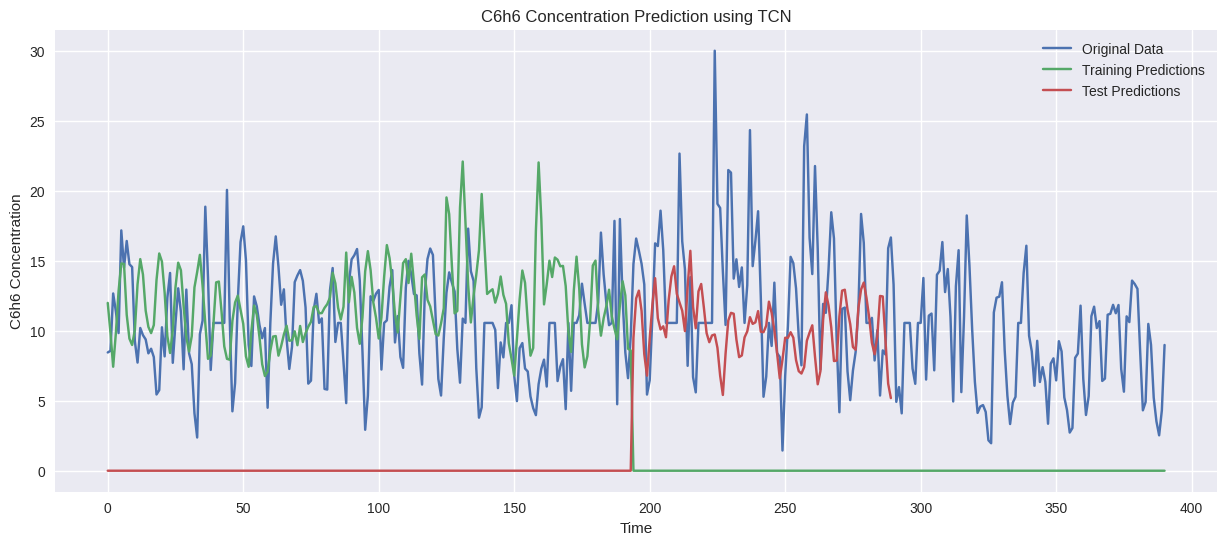

In [162]:
# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(np.concatenate((train_predict, np.zeros(shape=(len(scaled_data) - len(train_predict), 1))), axis=0), label='Training Predictions')
plt.plot(np.concatenate((np.zeros(shape=(len(train_predict), 1)), test_predict), axis=0), label='Test Predictions')
plt.title('C6h6 Concentration Prediction using TCN')
plt.xlabel('Time')
plt.ylabel('C6h6 Concentration')
plt.legend()
plt.show()

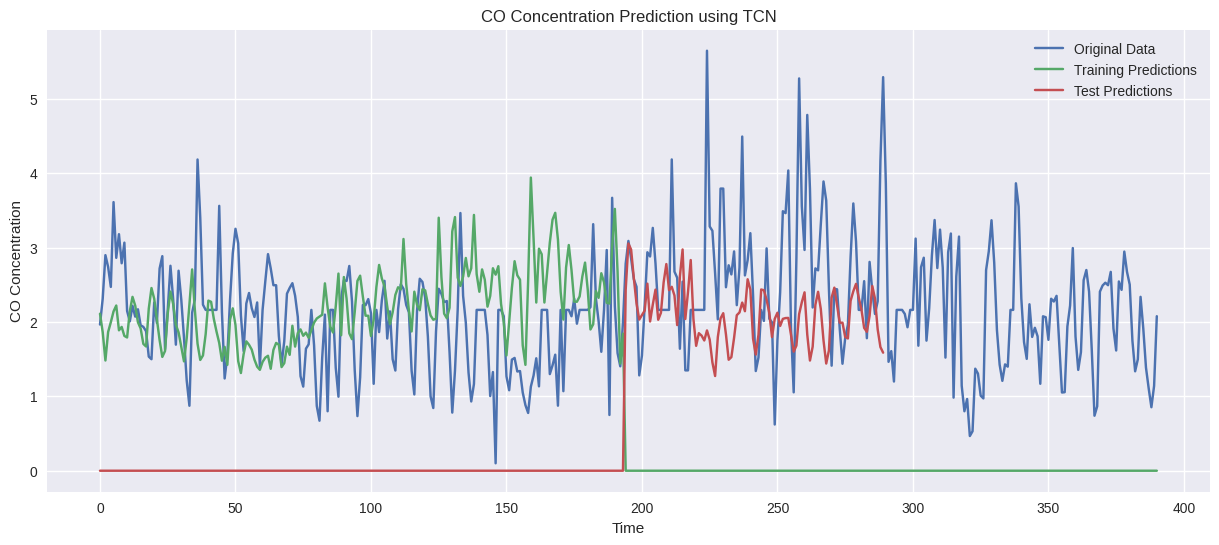

In [ ]:
# Plotting the results
plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Original Data')
plt.plot(np.concatenate((train_predict, np.zeros(shape=(len(scaled_data) - len(train_predict), 1))), axis=0), label='Training Predictions')
plt.plot(np.concatenate((np.zeros(shape=(len(train_predict), 1)), test_predict), axis=0), label='Test Predictions')
plt.title('CO Concentration Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()

In [ ]:
# Function to generate predictions for multiple steps ahead
def forecast_multi_step(model, start_data, steps):
    input_data = start_data
    predictions = []

    for _ in range(steps):
        # Reshape data for the model (1, time_step, 1)
        input_data_reshaped = input_data.reshape((1, time_step, 1))

        # Predict the next step
        prediction = model.predict(input_data_reshaped)

        # Append the prediction
        predictions.append(prediction[0, 0])

        # Update the input data to include the prediction
        input_data = np.append(input_data[1:], prediction)

    return np.array(predictions)

# Prepare the last part of your data as the starting point
last_known_data = scaled_data[-time_step:]

# Forecast for the next 30 days
forecast_steps = 30
forecast = forecast_multi_step(model, last_known_data, forecast_steps)

# Inverse transform the forecast to original scale
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))


1/1 [==============================] - 0s 31ms/step


In [163]:
# Function to generate predictions for multiple steps ahead
def forecast_multi_step(model, start_data, steps):
    input_data = start_data
    predictions = []

    for _ in range(steps):
        # Reshape data for the model (1, time_step, 1)
        input_data_reshaped = input_data.reshape((1, time_step, 1))

        # Predict the next step
        prediction = model.predict(input_data_reshaped)

        # Append the prediction
        predictions.append(prediction[0, 0])

        # Update the input data to include the prediction
        input_data = np.append(input_data[1:], prediction)

    return np.array(predictions)

# Prepare the last part of your data as the starting point
last_known_data = scaled_data[-time_step:]

# Forecast for the next 30 days
forecast_steps = 30
forecast = forecast_multi_step(model, last_known_data, forecast_steps)

# Inverse transform the forecast to original scale
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))

1/1 [==============================] - 0s 71ms/step


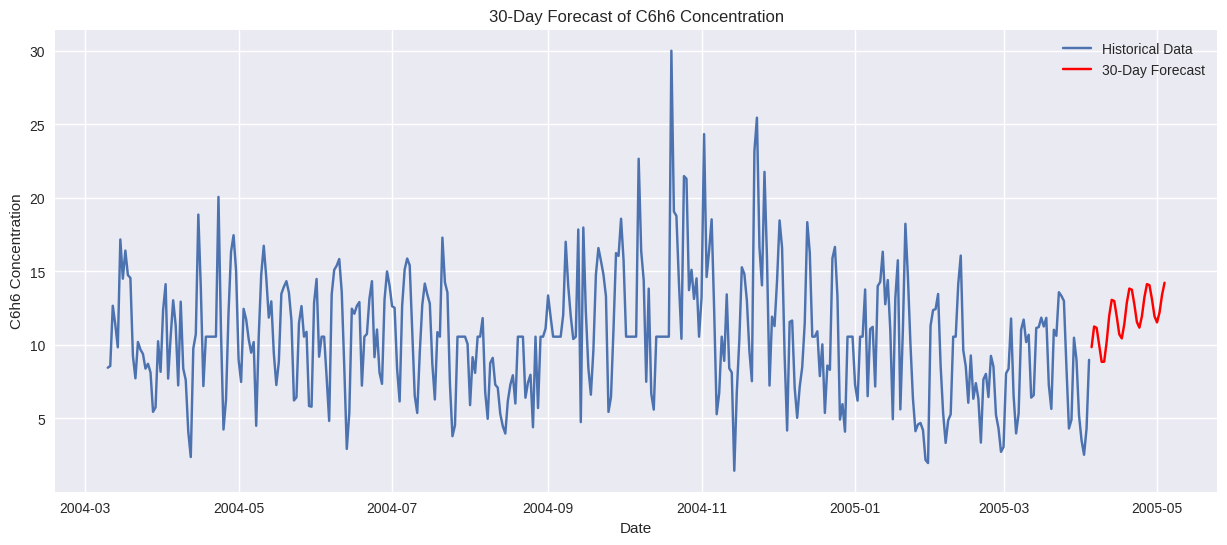

In [165]:
# Create a time index for the forecast
last_date = daily_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, closed='right')

# Plotting the forecast
plt.figure(figsize=(15, 6))
plt.plot(daily_data['C6H6(GT)'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='30-Day Forecast', color='red')
plt.title('30-Day Forecast of C6h6 Concentration')
plt.xlabel('Date')
plt.ylabel('C6h6 Concentration')
plt.legend()
plt.show()

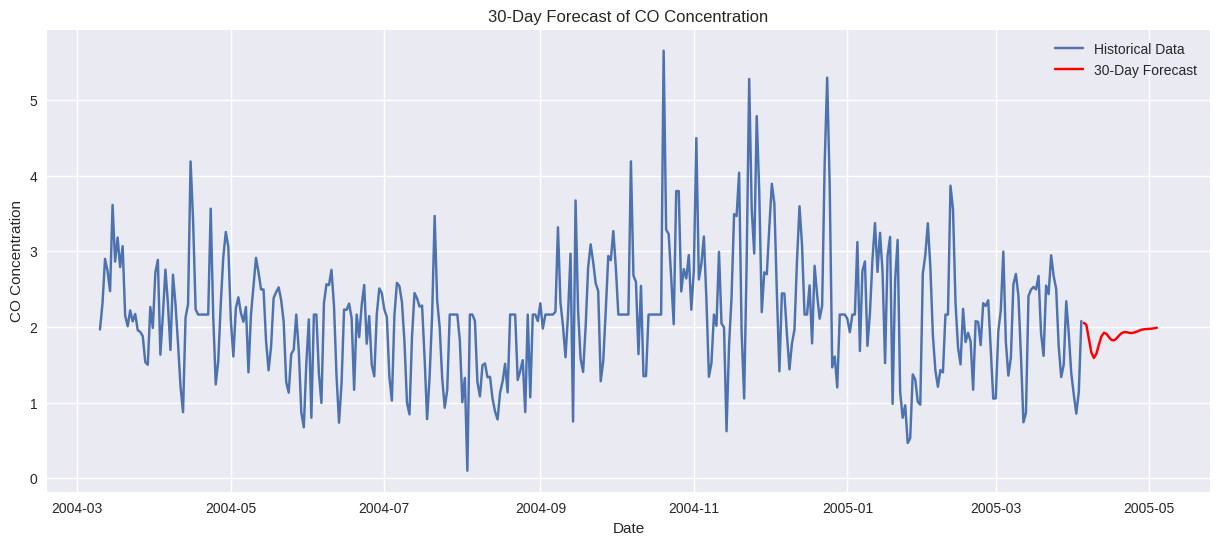

In [ ]:
# Create a time index for the forecast
last_date = daily_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, closed='right')

# Plotting the forecast
plt.figure(figsize=(15, 6))
plt.plot(daily_data['CO(GT)'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='30-Day Forecast', color='red')
plt.title('30-Day Forecast of CO Concentration')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual values for comparison
train_y_inv = scaler.inverse_transform(train_y.reshape(-1, 1))
test_y_inv = scaler.inverse_transform(test_y.reshape(-1, 1))

# Calculate metrics
train_mse = mean_squared_error(train_y_inv, train_predict)
train_r2 = r2_score(train_y_inv, train_predict)
train_mae = mean_absolute_error(train_y_inv, train_predict)

test_mse = mean_squared_error(test_y_inv, test_predict)
test_r2 = r2_score(test_y_inv, test_predict)
test_mae = mean_absolute_error(test_y_inv, test_predict)

# Print out the metrics
print(f"Training Metrics:\nMSE: {train_mse}\nR2: {train_r2}\nMAE: {train_mae}\n")
print(f"Test Metrics:\nMSE: {test_mse}\nR2: {test_r2}\nMAE: {test_mae}")


Training Metrics:
MSE: 0.5438906700836229
R2: 0.3128627995511698
MAE: 0.5236928657021837

Test Metrics:
MSE: 0.48713126505324844
R2: 0.10819664156890785
MAE: 0.5653585507305451


In [166]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual values for comparison
train_y_inv = scaler.inverse_transform(train_y.reshape(-1, 1))
test_y_inv = scaler.inverse_transform(test_y.reshape(-1, 1))

# Calculate metrics
train_mse = mean_squared_error(train_y_inv, train_predict)
train_r2 = r2_score(train_y_inv, train_predict)
train_mae = mean_absolute_error(train_y_inv, train_predict)

test_mse = mean_squared_error(test_y_inv, test_predict)
test_r2 = r2_score(test_y_inv, test_predict)
test_mae = mean_absolute_error(test_y_inv, test_predict)

# Print out the metrics
print(f"Training Metrics:\nMSE: {train_mse}\nR2: {train_r2}\nMAE: {train_mae}\n")
print(f"Test Metrics:\nMSE: {test_mse}\nR2: {test_r2}\nMAE: {test_mae}")

Training Metrics:
MSE: 15.318016834258252
R2: 0.2522157690264404
MAE: 2.7940554556089645

Test Metrics:
MSE: 12.856635836651009
R2: 0.07900921786743498
MAE: 2.9674043805033157


GRU(Gated Recurrent Units) Multi Variate

In [224]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the GRU model architecture
model = Sequential([
    GRU(units=64, input_shape=(time_step, len(features)), return_sequences=True),
    Dropout(0.2),
    GRU(units=32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary to verify the architecture
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with the EarlyStopping callback
history = model.fit(
    train_X, train_y,
    epochs=100,
    validation_data=(test_X, test_y),
    batch_size=32,
    callbacks=[early_stopping]
)


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 100, 64)           14976     
                                                                 
 dropout_13 (Dropout)        (None, 100, 64)           0         
                                                                 
 gru_13 (GRU)                (None, 32)                9408      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 24417 (95.38 KB)
Trainable params: 24417 (95.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
7/7 [

In [225]:
# Generate predictions for the training and test sets
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# Inverse transform predictions
# As before, we construct the full sets for inverse transformation
train_full = np.zeros((len(train_predict), len(features)))
test_full = np.zeros((len(test_predict), len(features)))

train_full[:, 0] = train_predict[:, 0]
test_full[:, 0] = test_predict[:, 0]

train_predict_original = scaler.inverse_transform(train_full)[:, 0]
test_predict_original = scaler.inverse_transform(test_full)[:, 0]

# Combine training and test predictions for plotting
combined_predict = np.concatenate((train_predict_original, test_predict_original))

3/3 [==============================] - 0s 6ms/step


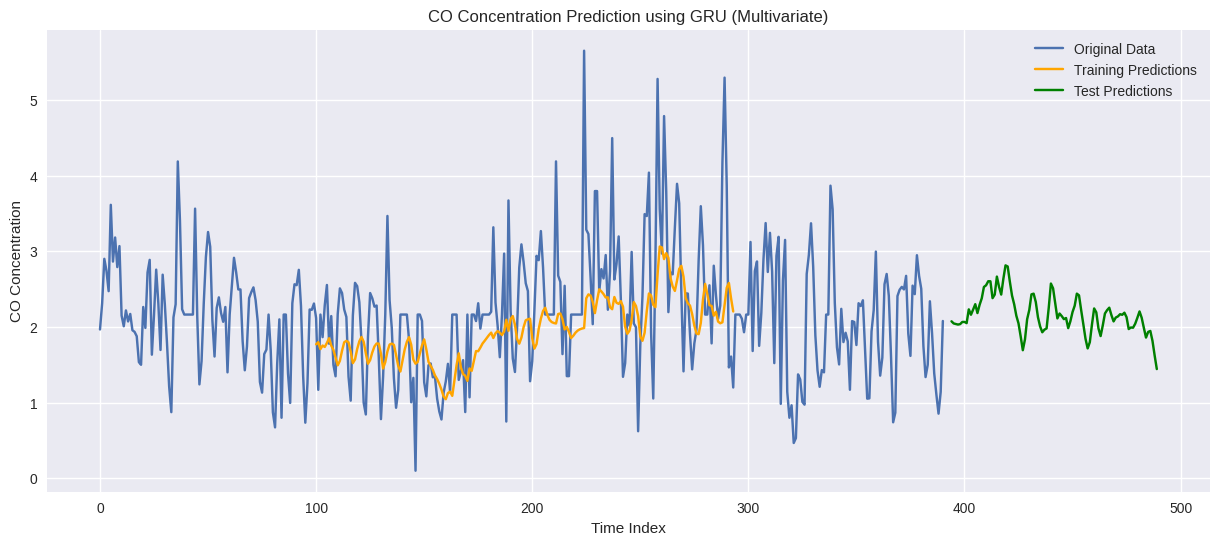

In [220]:
plt.figure(figsize=(15, 6))

# Plot original data
plt.plot(daily_data['CO(GT)'].values, label='Original Data')

# Plot training predictions
# Align predictions with the original data index
train_pred_index = range(time_step, len(train_predict_original) + time_step)
plt.plot(train_pred_index, train_predict_original, label='Training Predictions', color='orange')

# Plot test predictions
# Align predictions with the original data index
test_pred_index = range(len(train_predict_original) + (2 * time_step), len(combined_predict) + (2 * time_step))
plt.plot(test_pred_index, test_predict_original, label='Test Predictions', color='green')

plt.title('CO Concentration Prediction using GRU (Multivariate)')
plt.xlabel('Time Index')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()

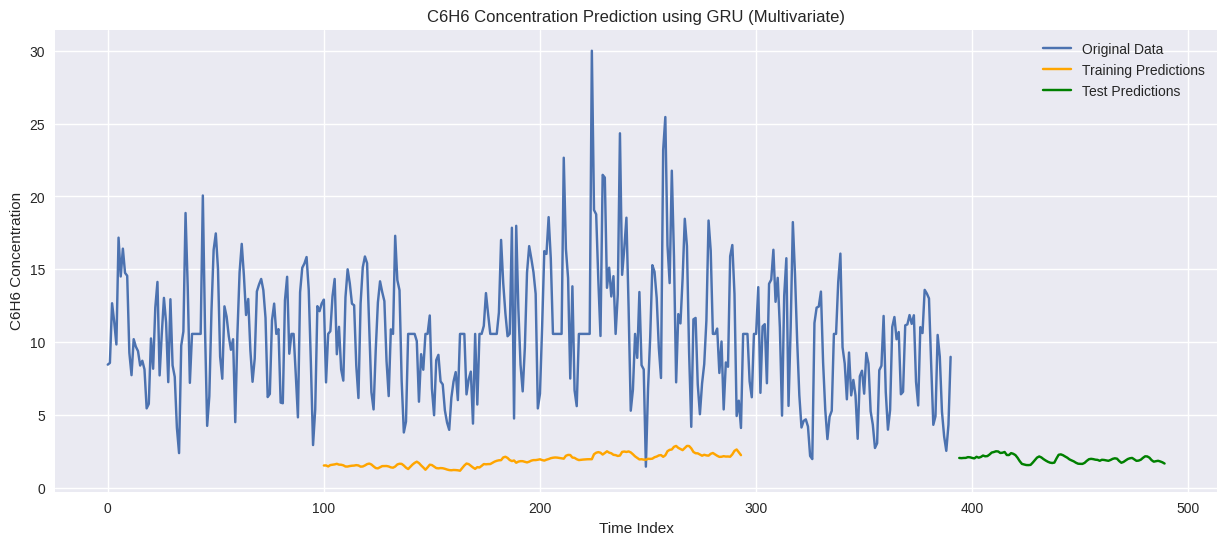

In [226]:
plt.figure(figsize=(15, 6))

# Plot original data
plt.plot(daily_data['C6H6(GT)'].values, label='Original Data')

# Plot training predictions
# Align predictions with the original data index
train_pred_index = range(time_step, len(train_predict_original) + time_step)
plt.plot(train_pred_index, train_predict_original, label='Training Predictions', color='orange')

# Plot test predictions
# Align predictions with the original data index
test_pred_index = range(len(train_predict_original) + (2 * time_step), len(combined_predict) + (2 * time_step))
plt.plot(test_pred_index, test_predict_original, label='Test Predictions', color='green')

plt.title('C6H6 Concentration Prediction using GRU (Multivariate)')
plt.xlabel('Time Index')
plt.ylabel('C6H6 Concentration')
plt.legend()
plt.show()

In [227]:
def forecast_multivariate(model, start_data, n_steps, n_features):
    input_data = start_data.copy()
    output = []

    for _ in range(n_steps):
        # Reshape data to fit model input
        input_data_reshaped = input_data.reshape((1, time_step, n_features))

        # Get the next prediction
        pred = model.predict(input_data_reshaped)

        # Add prediction to output
        output.append(pred[0, 0])

        # Shift the input_data by one time step
        input_data = np.roll(input_data, -n_features, axis=0)

        # Update only the target feature (first feature) in the last time step with the new prediction
        input_data[-1, 0] = pred[0, 0]

    return np.array(output)

# Prepare the last known data as input
last_input_data = scaled_data[-time_step:]

# Forecast for 30 days
n_future_steps = 30
forecast = forecast_multivariate(model, last_input_data, n_future_steps, len(features))

# # Rescale the forecast back to the original scale
# full_forecast = np.zeros((n_future_steps, len(features)))
# full_forecast[:, 0] = forecast
# forecast_original_scale = scaler.inverse_transform(full_forecast)[:, 0]

# # Generate the corresponding dates for the forecast
# forecast_dates = pd.date_range(start=daily_data.index[-1], periods=n_future_steps+1, closed='right')

# # Plotting the forecast results
# plt.figure(figsize=(15, 6))
# plt.plot(daily_data.index, daily_data['CO(GT)'], label='Historical Data')
# plt.plot(forecast_dates, forecast_original_scale, label='30-Day Forecast', color='red')
# plt.title('30-Day Forecast of CO Concentration using GRU')
# plt.xlabel('Date')
# plt.ylabel('CO Concentration')
# plt.legend()
# plt.show()


1/1 [==============================] - 0s 19ms/step


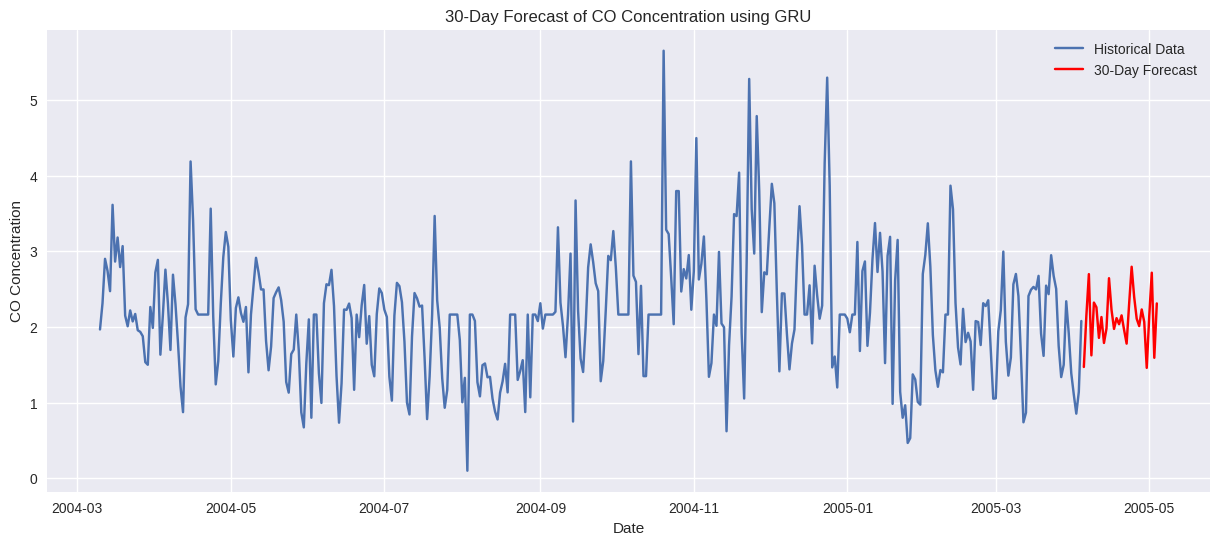

In [222]:
# Rescale the forecast back to the original scale
full_forecast = np.zeros((n_future_steps, len(features)))
full_forecast[:, 0] = forecast
forecast_original_scale = scaler.inverse_transform(full_forecast)[:, 0]

# Generate the corresponding dates for the forecast
forecast_dates = pd.date_range(start=daily_data.index[-1], periods=n_future_steps+1, closed='right')

# Plotting the forecast results
plt.figure(figsize=(15, 6))
plt.plot(daily_data.index, daily_data['CO(GT)'], label='Historical Data')
plt.plot(forecast_dates, forecast_original_scale, label='30-Day Forecast', color='red')
plt.title('30-Day Forecast of CO Concentration using GRU')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()

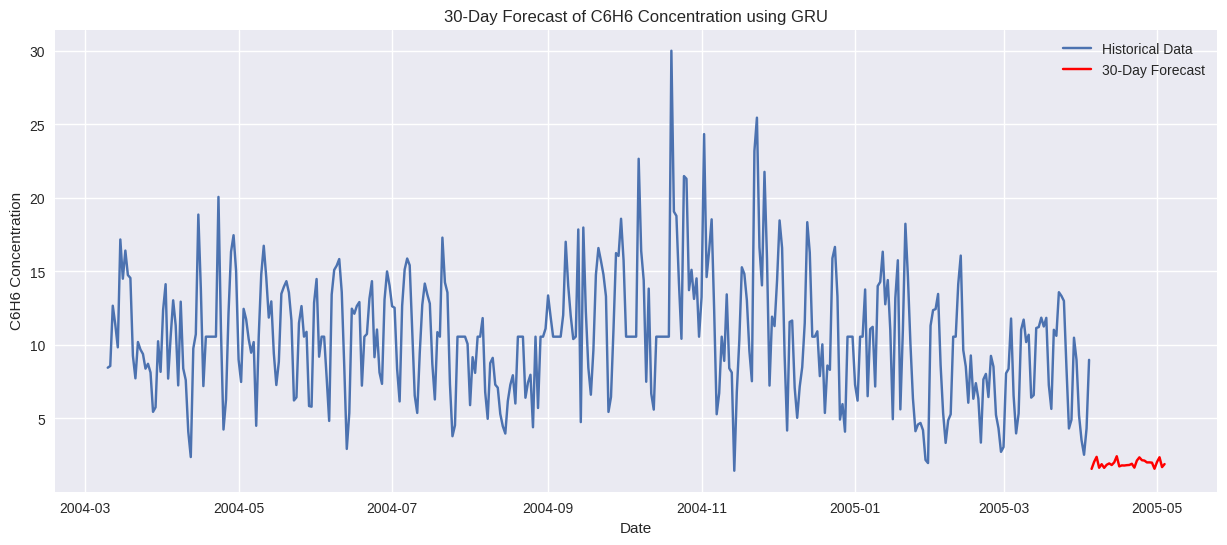

In [228]:
# Rescale the forecast back to the original scale
full_forecast = np.zeros((n_future_steps, len(features)))
full_forecast[:, 0] = forecast
forecast_original_scale = scaler.inverse_transform(full_forecast)[:, 0]

# Generate the corresponding dates for the forecast
forecast_dates = pd.date_range(start=daily_data.index[-1], periods=n_future_steps+1, closed='right')

# Plotting the forecast results
plt.figure(figsize=(15, 6))
plt.plot(daily_data.index, daily_data['C6H6(GT)'], label='Historical Data')
plt.plot(forecast_dates, forecast_original_scale, label='30-Day Forecast', color='red')
plt.title('30-Day Forecast of C6H6 Concentration using GRU')
plt.xlabel('Date')
plt.ylabel('C6H6 Concentration')
plt.legend()
plt.show()

In [223]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual target values if they were scaled
# This assumes 'train_y' and 'test_y' are the true values in scaled form
# If 'train_y' and 'test_y' are already in the original scale, you can skip this step

# Create a full array of zeros for the features, as we did with the predictions
train_full_y = np.zeros((len(train_y), len(features)))
test_full_y = np.zeros((len(test_y), len(features)))

# Insert the actual target values into the first column
train_full_y[:, 0] = train_y.reshape(-1)
test_full_y[:, 0] = test_y.reshape(-1)

# Inverse transform the actual values
train_y_original = scaler.inverse_transform(train_full_y)[:, 0]
test_y_original = scaler.inverse_transform(test_full_y)[:, 0]

# Calculate metrics for the training set
train_mse = mean_squared_error(train_y_original, train_predict_original)
train_r2 = r2_score(train_y_original, train_predict_original)
train_mae = mean_absolute_error(train_y_original, train_predict_original)

# Calculate metrics for the test set
test_mse = mean_squared_error(test_y_original, test_predict_original)
test_r2 = r2_score(test_y_original, test_predict_original)
test_mae = mean_absolute_error(test_y_original, test_predict_original)

# Print out the metrics
print(f"Training Metrics:\nMSE: {train_mse}\nR2: {train_r2}\nMAE: {train_mae}\n")
print(f"Test Metrics:\nMSE: {test_mse}\nR2: {test_r2}\nMAE: {test_mae}")



Training Metrics:
MSE: 0.682152621586281
R2: 0.13818627812909534
MAE: 0.6152991560885771

Test Metrics:
MSE: 0.6460772467025494
R2: -0.1827897319468197
MAE: 0.6424552808015537


In [229]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inverse transform the actual target values if they were scaled
# This assumes 'train_y' and 'test_y' are the true values in scaled form
# If 'train_y' and 'test_y' are already in the original scale, you can skip this step

# Create a full array of zeros for the features, as we did with the predictions
train_full_y = np.zeros((len(train_y), len(features)))
test_full_y = np.zeros((len(test_y), len(features)))

# Insert the actual target values into the first column
train_full_y[:, 0] = train_y.reshape(-1)
test_full_y[:, 0] = test_y.reshape(-1)

# Inverse transform the actual values
train_y_original = scaler.inverse_transform(train_full_y)[:, 0]
test_y_original = scaler.inverse_transform(test_full_y)[:, 0]

# Calculate metrics for the training set
train_mse = mean_squared_error(train_y_original, train_predict_original)
train_r2 = r2_score(train_y_original, train_predict_original)
train_mae = mean_absolute_error(train_y_original, train_predict_original)

# Calculate metrics for the test set
test_mse = mean_squared_error(test_y_original, test_predict_original)
test_r2 = r2_score(test_y_original, test_predict_original)
test_mae = mean_absolute_error(test_y_original, test_predict_original)

# Print out the metrics
print(f"Training Metrics:\nMSE: {train_mse}\nR2: {train_r2}\nMAE: {train_mae}\n")
print(f"Test Metrics:\nMSE: {test_mse}\nR2: {test_r2}\nMAE: {test_mae}")

Training Metrics:
MSE: 0.7457194602919112
R2: 0.05787760215409954
MAE: 0.6445354286293725

Test Metrics:
MSE: 0.5499735313739148
R2: -0.006850262985792277
MAE: 0.6103055231477259


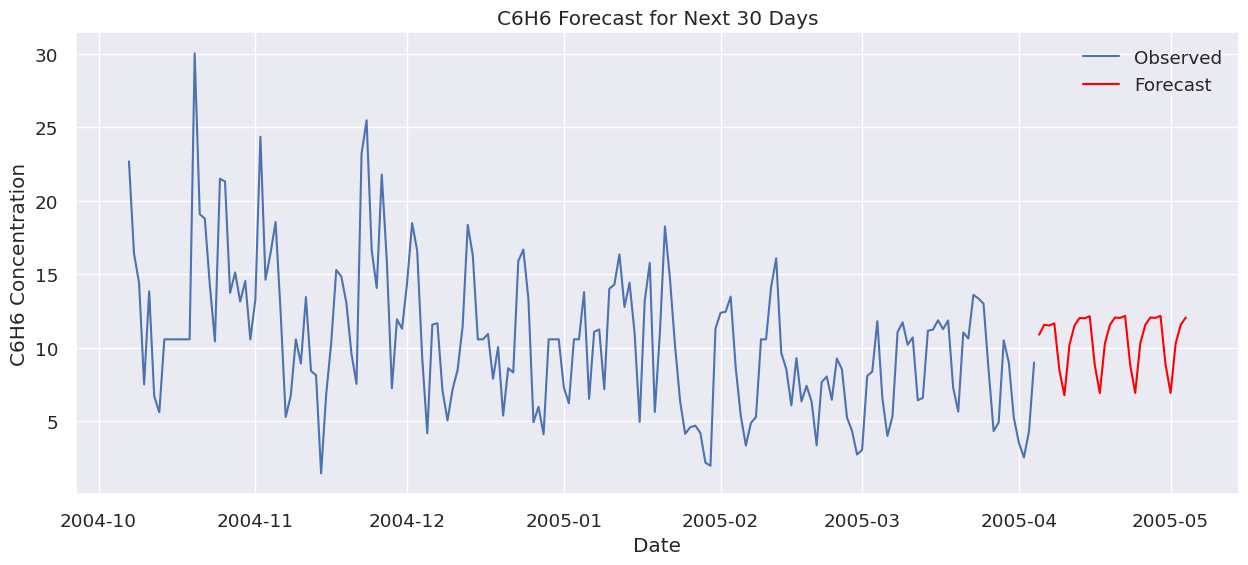

(2005-04-05    10.880356
 2005-04-06    11.546984
 2005-04-07    11.503827
 2005-04-08    11.649972
 2005-04-09     8.485614
 2005-04-10     6.755267
 2005-04-11    10.193440
 2005-04-12    11.508575
 2005-04-13    12.015453
 2005-04-14    11.992651
 2005-04-15    12.136436
 2005-04-16     8.823973
 2005-04-17     6.905156
 2005-04-18    10.270876
 2005-04-19    11.550140
 2005-04-20    12.044253
 2005-04-21    12.019198
 2005-04-22    12.161041
 2005-04-23     8.840791
 2005-04-24     6.912800
 2005-04-25    10.274875
 2005-04-26    11.552306
 2005-04-27    12.045722
 2005-04-28    12.020496
 2005-04-29    12.162212
 2005-04-30     8.841586
 2005-05-01     6.913165
 2005-05-02    10.275067
 2005-05-03    11.552410
 2005-05-04    12.045792
 Freq: D, Name: predicted_mean, dtype: float64,
 4.267358443096531)

In [ ]:
# Adjust SARIMA model parameters for daily data
seasonal_order = (1, 1, 1, 7)  # assuming weekly seasonality

# Adjust the forecast period for daily data
forecast_period = 30  # 30 days

# Forecasting for CO
co_forecast, co_mse = forecast_sarima(daily_data['C6H6(GT)'], order, seasonal_order, forecast_period)

# Adjust the plotting for daily data
plt.figure(figsize=(15, 6))
plt.plot(daily_data['C6H6(GT)'][-180:], label='Observed')  # last 90 days (3 months)
plt.plot(co_forecast, label='Forecast', color='red')
plt.title('C6H6 Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('C6H6 Concentration')
plt.legend()
plt.show()

co_forecast, co_mse

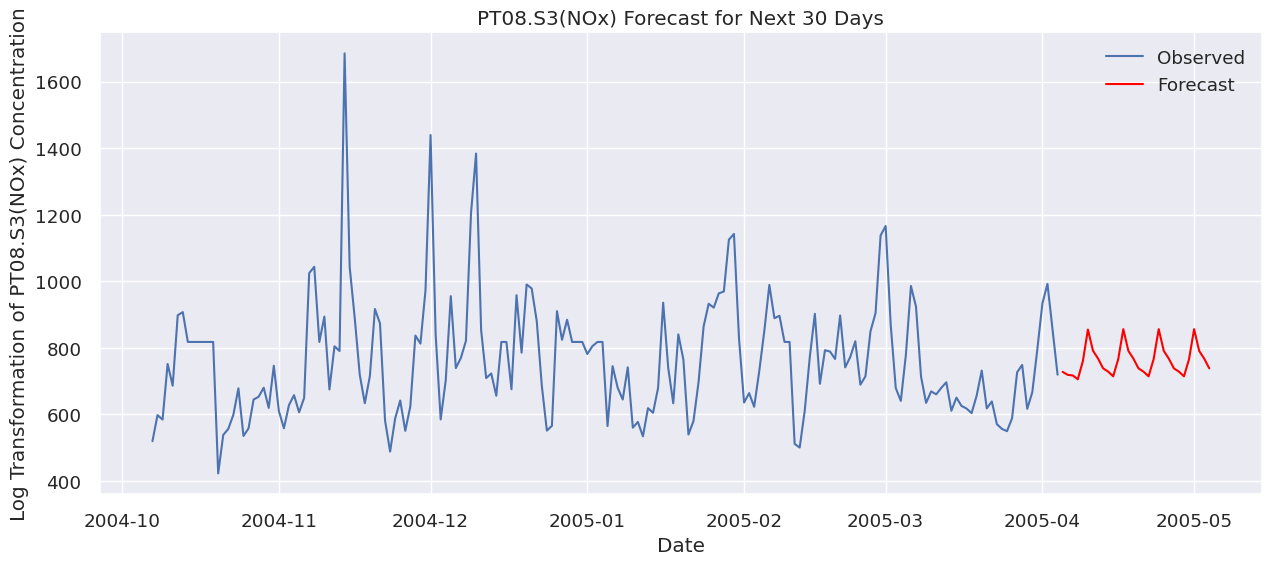

(2005-04-05    727.288108
 2005-04-06    718.367702
 2005-04-07    716.534028
 2005-04-08    705.070141
 2005-04-09    759.443228
 2005-04-10    854.548509
 2005-04-11    791.192995
 2005-04-12    767.358138
 2005-04-13    738.066516
 2005-04-14    728.028518
 2005-04-15    714.011329
 2005-04-16    765.925634
 2005-04-17    855.772345
 2005-04-18    790.518662
 2005-04-19    766.948205
 2005-04-20    737.864742
 2005-04-21    727.897672
 2005-04-22    713.889636
 2005-04-23    765.829434
 2005-04-24    855.759227
 2005-04-25    790.534430
 2005-04-26    766.957319
 2005-04-27    737.869225
 2005-04-28    727.900427
 2005-04-29    713.891989
 2005-04-30    765.831224
 2005-05-01    855.759511
 2005-05-02    790.534182
 2005-05-03    766.957173
 2005-05-04    737.869153
 Freq: D, Name: predicted_mean, dtype: float64,
 142.3570233630347)

In [ ]:
# Adjust SARIMA model parameters for daily data
seasonal_order = (1, 1, 1, 7)  # assuming weekly seasonality

# Adjust the forecast period for daily data
forecast_period = 30  # 30 days

# Forecasting for CO
co_forecast, co_mse = forecast_sarima(daily_data['PT08.S3(NOx)'], order, seasonal_order, forecast_period)

# Adjust the plotting for daily data
plt.figure(figsize=(15, 6))
plt.plot(daily_data['PT08.S3(NOx)'][-180:], label='Observed')  # last 90 days (3 months)
plt.plot(co_forecast, label='Forecast', color='red')
plt.title('PT08.S3(NOx) Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Log Transformation of PT08.S3(NOx) Concentration')
plt.legend()
plt.show()

co_forecast, co_mse

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# # Convert DateTime to datetime object and set it as the index
# data['DateTime'] = pd.to_datetime(data['DateTime'])
# data.set_index('DateTime', inplace=True)

# Function to implement SARIMA model and forecast
def forecast_sarima(series, order, seasonal_order, forecast_period):
    # Fit the SARIMA model
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.get_forecast(steps=forecast_period)
    forecast_index = pd.date_range(series.index[-1], periods=forecast_period+1, closed='right')
    forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

    # Calculate accuracy (MSE)
    forecast_errors = mean_squared_error(series[-forecast_period:], forecast_series[:forecast_period], squared=False)

    return forecast_series, forecast_errors

# SARIMA model parameters
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 24)  # assuming daily seasonality

# Forecast period
forecast_period = 30 * 24  # 30 days

# Forecasting for CO
co_forecast, co_mse = forecast_sarima(data['CO(GT)'], order, seasonal_order, forecast_period)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['CO(GT)'][-3*30*24:], label='Observed')
plt.plot(co_forecast, label='Forecast', color='red')
plt.title('CO Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()

co_forecast, co_mse


In [ ]:
# Convert the 'Date' column to datetime if it's not already the index
dataviz['DateTime'] = pd.to_datetime(dataviz['DateTime'])
dataviz.set_index('DateTime', inplace=True)

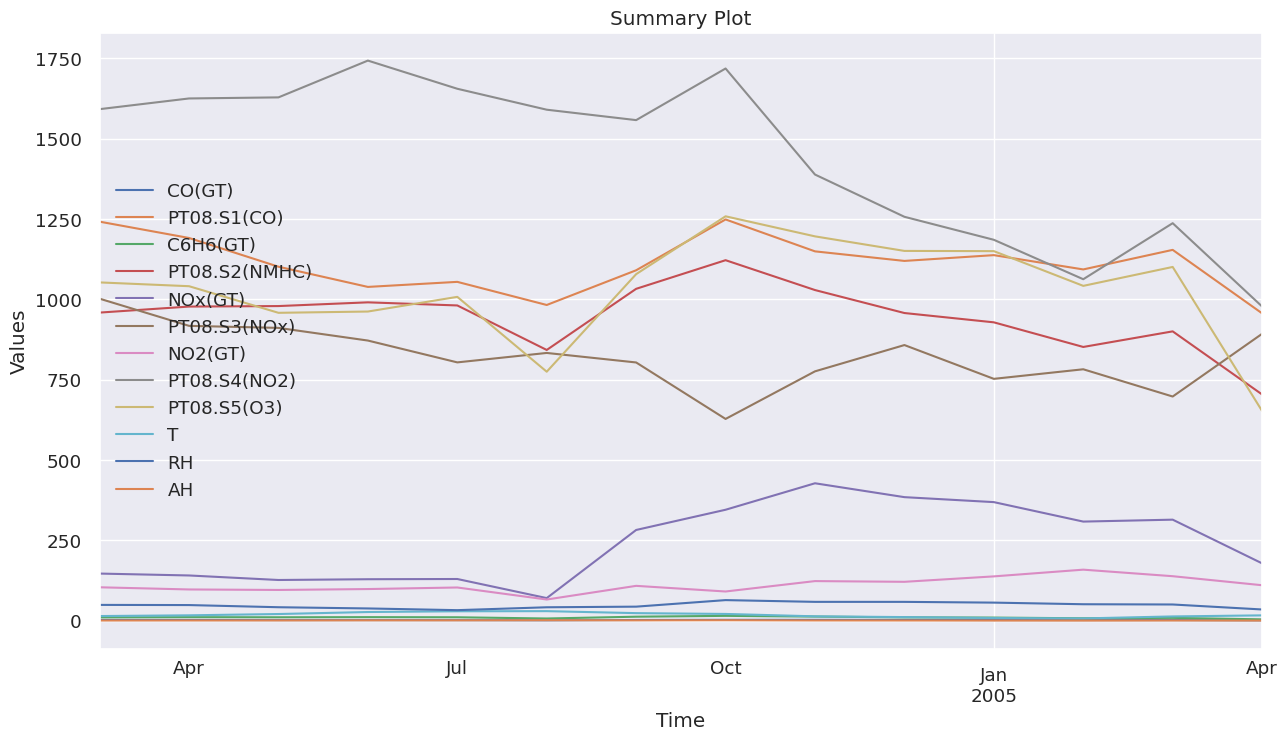

In [ ]:
summary_plot(dataviz, period='M')

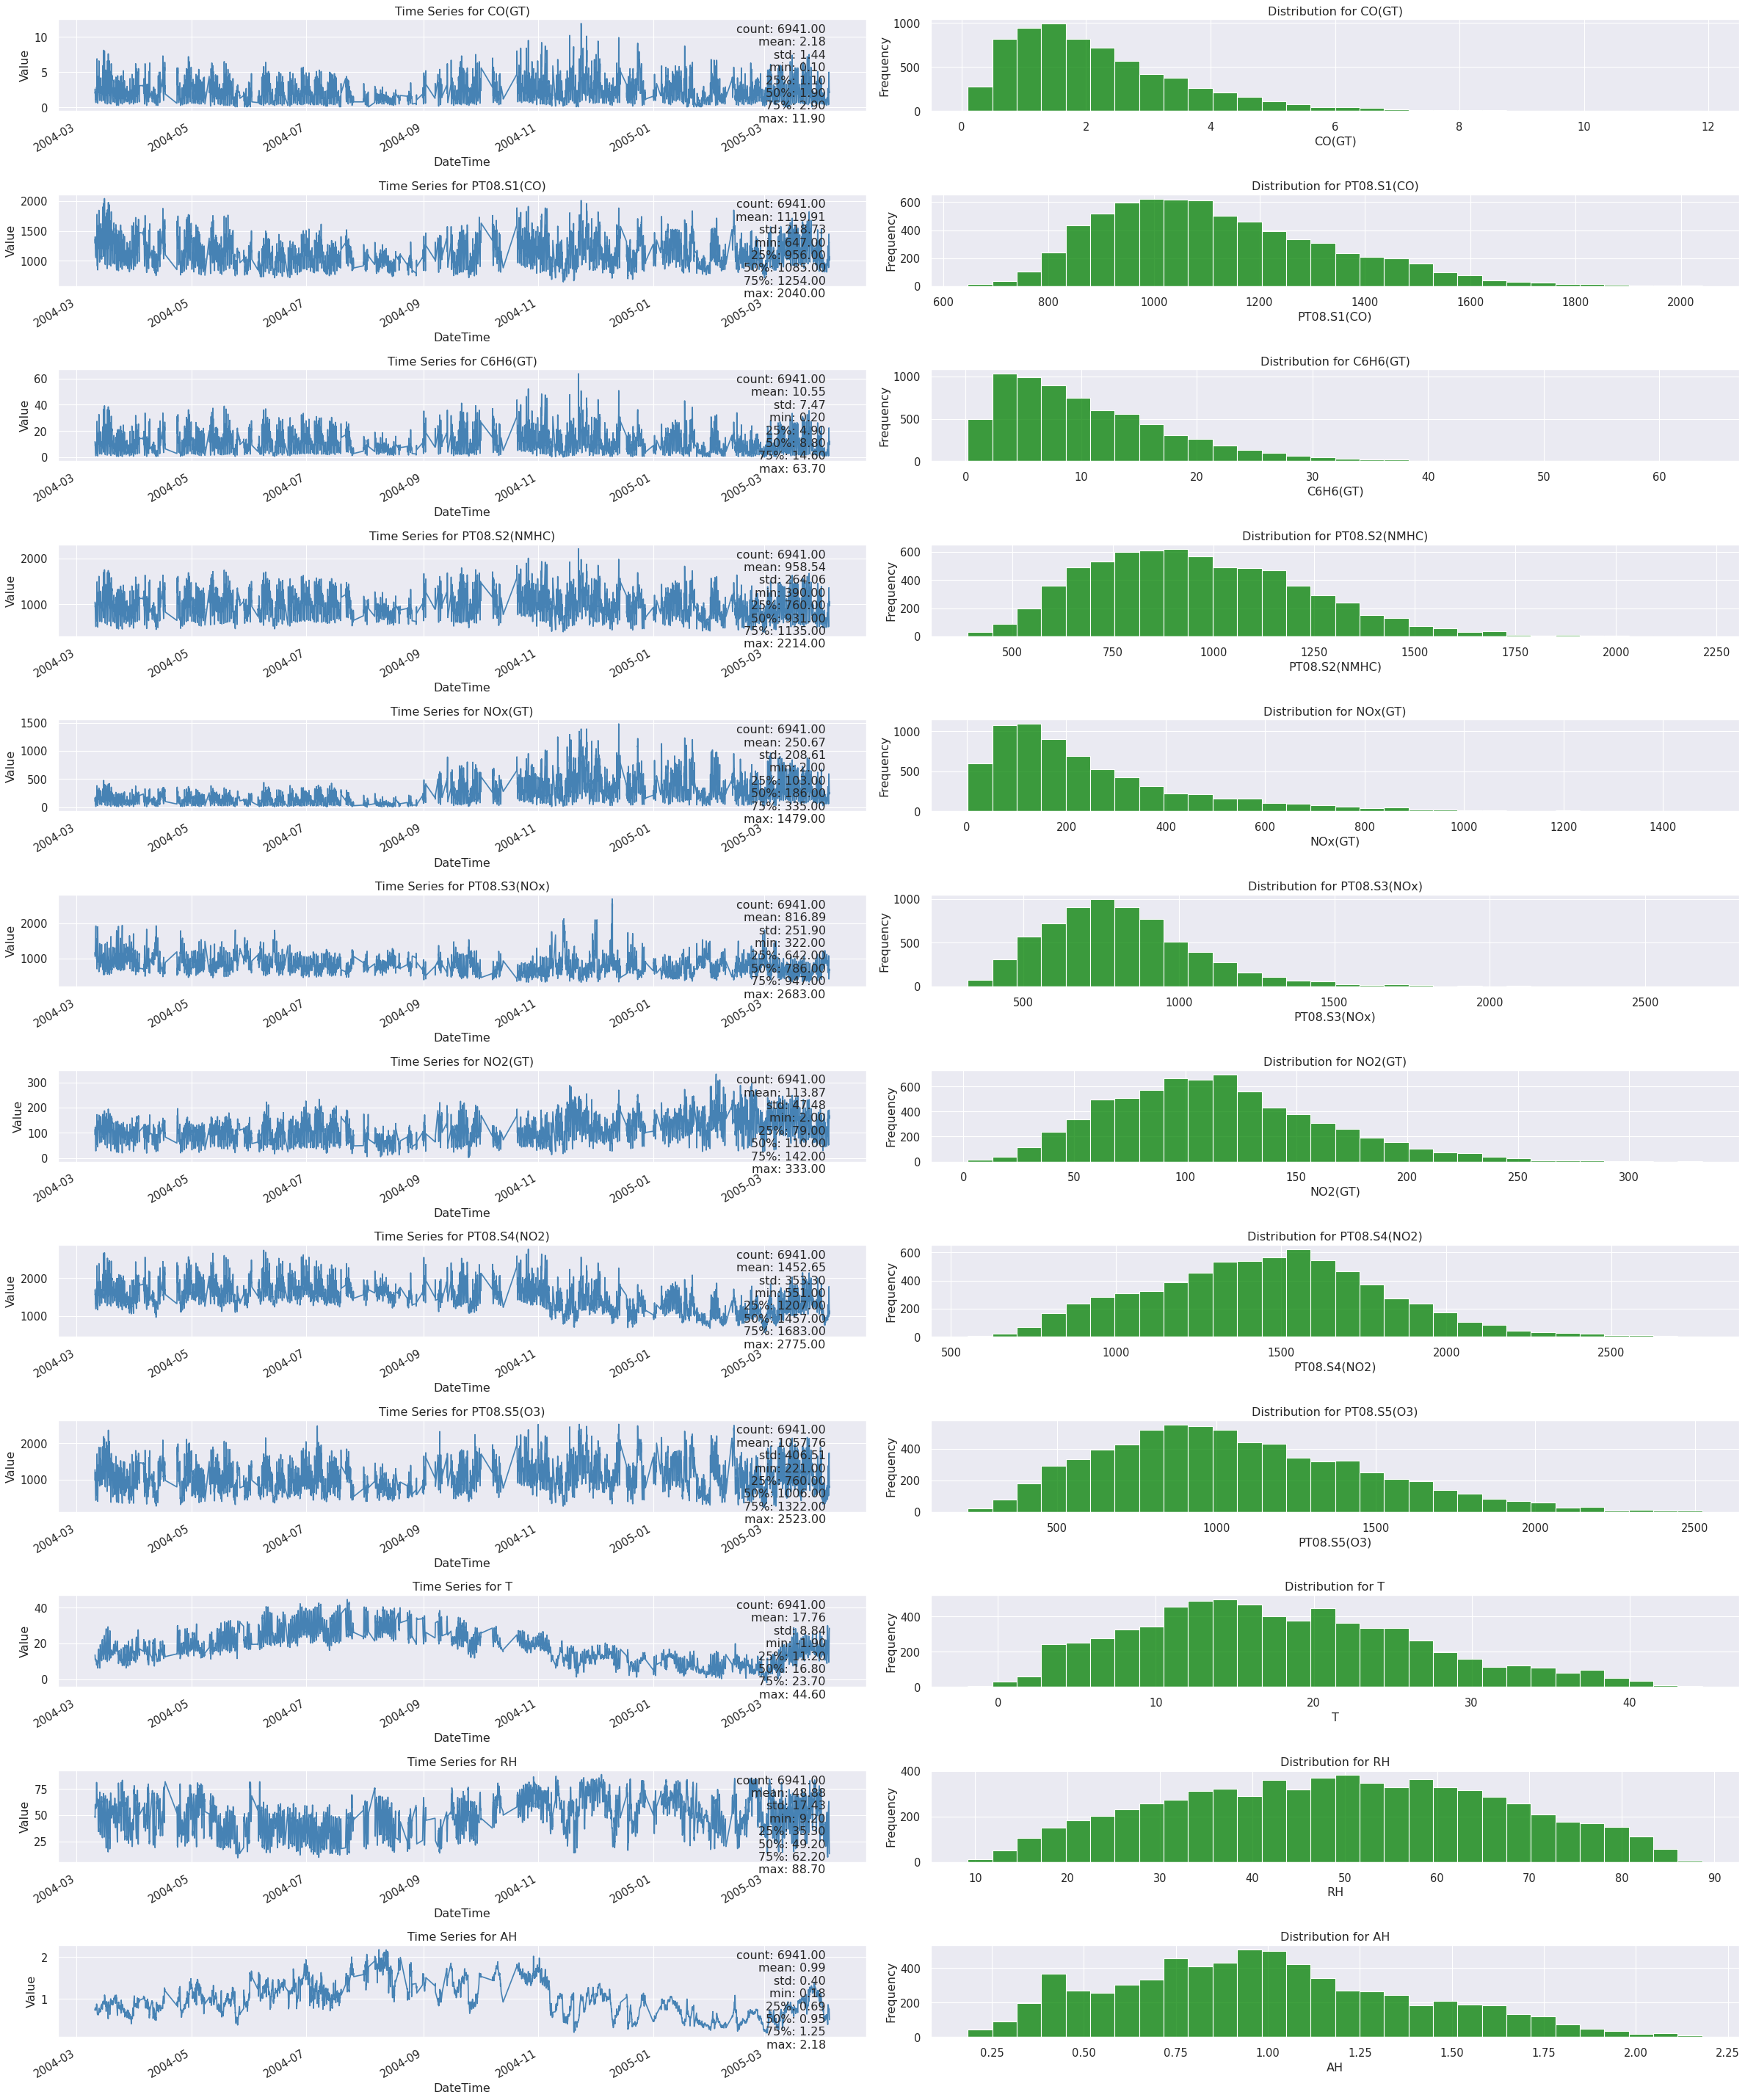

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def trend_level_plots(dataset):
    # Determine the number of numerical columns for plotting (excluding datetime index)
    num_columns = len(dataset.select_dtypes(include=[np.number]).columns)

    # Create the figure with a subplot for each numerical column
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(30, 3 * num_columns), dpi=80)

    # Loop over each numerical column and create the line and histogram plots
    for i, column in enumerate(dataset.select_dtypes(include=[np.number]).columns):
        # Line plot for the time series data
        dataset[column].plot(ax=axes[i, 0], color='steelblue')
        axes[i, 0].set_title(f'Time Series for {column}')
        axes[i, 0].set_ylabel('Value')

        # Histogram for the distribution
        sns.histplot(dataset[column], bins=30, kde=False, ax=axes[i, 1], color='green')
        axes[i, 1].set_title(f'Distribution for {column}')
        axes[i, 1].set_ylabel('Frequency')

        # Summary statistics as text in the line plot
        summary_stats = dataset[column].describe()
        stats_text = '\n'.join([f'{stat}: {value:.2f}' for stat, value in summary_stats.items()])
        axes[i, 0].text(0.95, 0.95, stats_text, transform=axes[i, 0].transAxes, verticalalignment='top', horizontalalignment='right')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Usage:
trend_level_plots(dataviz)

In [ ]:
def time_variation_plot(dataset, pollutant, title):
    # Determine the number of unique days in the data
    days = dataset.index.dayofweek.unique()
    num_days = len(days)

    # Create the figure with a subplot for each day
    fig, axes = plt.subplots(num_days, 1, figsize=(15, 3 * num_days), constrained_layout=True)
    fig.suptitle(title, fontsize=16)

    # Plot time series for each day
    for i, day in enumerate(days):
        daily_data = dataset[dataset.index.dayofweek == day]
        sns.lineplot(x=daily_data.index.hour, y=daily_data[pollutant], ci=95, ax=axes[i], color='blue')
        axes[i].set_title('Day ' + str(day) + ' Hourly Trend')
        axes[i].set_xlabel('Hour of Day')
        axes[i].set_ylabel(pollutant)

    plt.show()

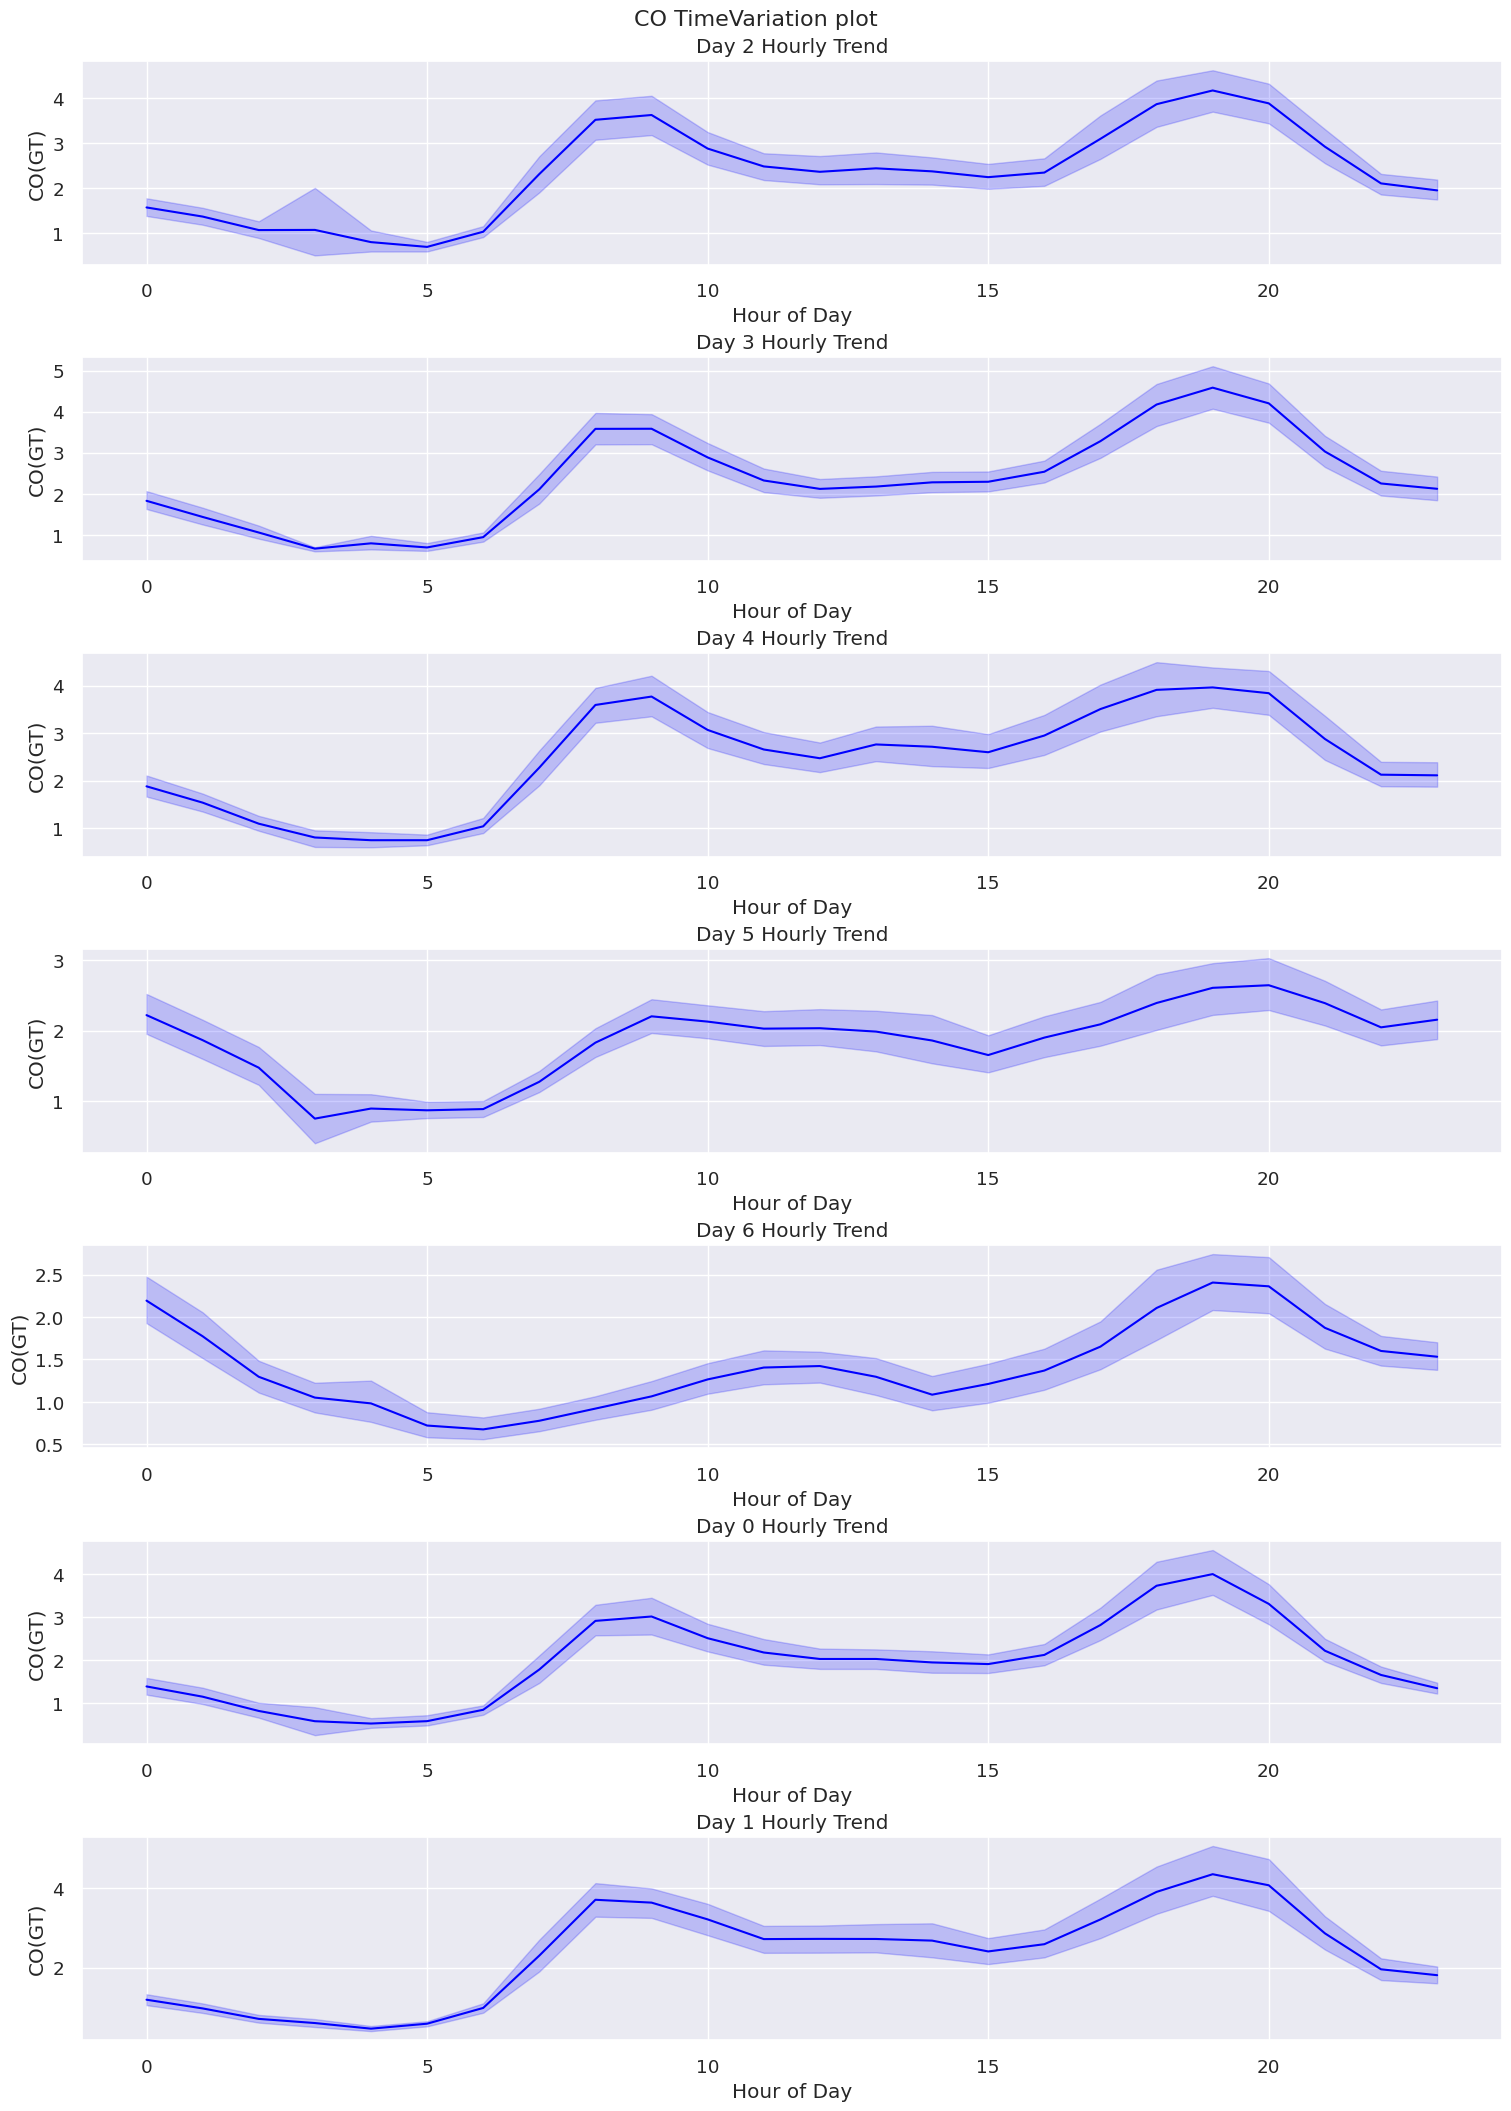

In [ ]:
time_variation_plot(dataviz, 'CO(GT)', 'CO TimeVariation plot')

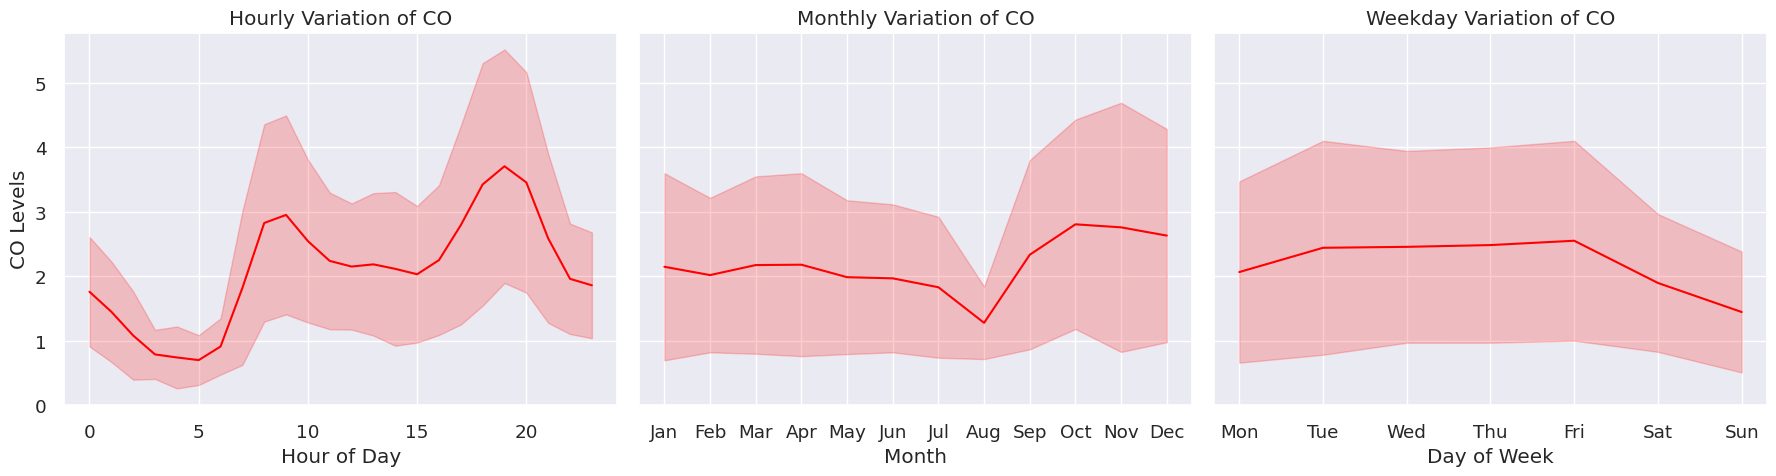

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Hourly variation plot
sns.lineplot(x=dataviz.index.hour, y=dataviz['CO(GT)'], ci='sd', ax=axes[0], color='red')
axes[0].set_title('Hourly Variation of CO')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('CO Levels')

# Monthly variation plot
sns.lineplot(x=dataviz.index.month, y=dataviz['CO(GT)'], ci='sd', ax=axes[1], color='red')
axes[1].set_title('Monthly Variation of CO')
axes[1].set_xlabel('Month')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Weekday variation plot
sns.lineplot(x=dataviz.index.weekday, y=dataviz['CO(GT)'], ci='sd', ax=axes[2], color='red')
axes[2].set_title('Weekday Variation of CO')
axes[2].set_xlabel('Day of Week')
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Adjust layout for tight fit and display the plot
plt.tight_layout()
plt.show()


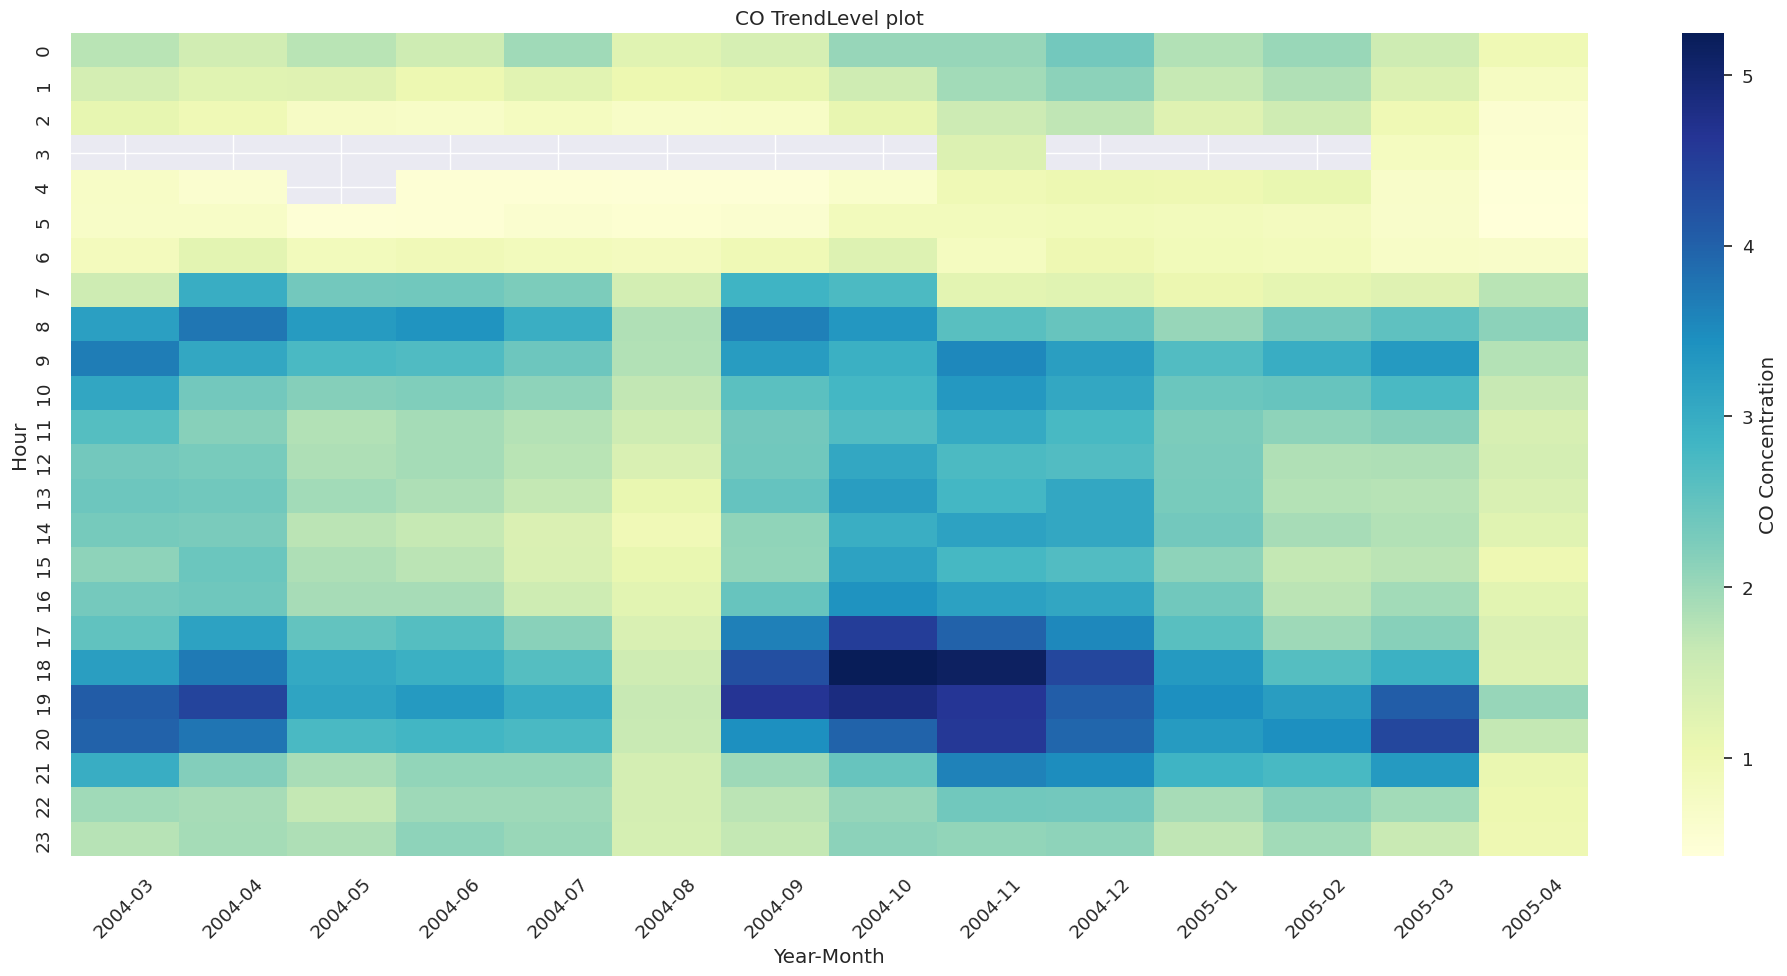

In [ ]:
# Extracting year, month, and hour from the index (DateTimeIndex)
dataviz['Year'] = dataviz.index.year
dataviz['Month'] = dataviz.index.month
dataviz['Hour'] = dataviz.index.hour

# Creating a 'Year-Month' column for proper grouping
dataviz['Year-Month'] = dataviz['Year'].astype(str) + '-' + dataviz['Month'].astype(str).str.zfill(2)

# Pivot the data to get 'Hour' as the rows and 'Year-Month' as the columns
heatmap_data = dataviz.pivot_table(values='CO(GT)', index='Hour', columns='Year-Month', aggfunc='mean')

# Sorting the columns to ensure they are in the correct order
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

# Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'CO Concentration'})
plt.title('CO TrendLevel plot')
plt.xlabel('Year-Month')
plt.ylabel('Hour')
plt.xticks(rotation=45)  # Rotate the x labels to fit them better
plt.tight_layout()  # Adjust layout
plt.show()


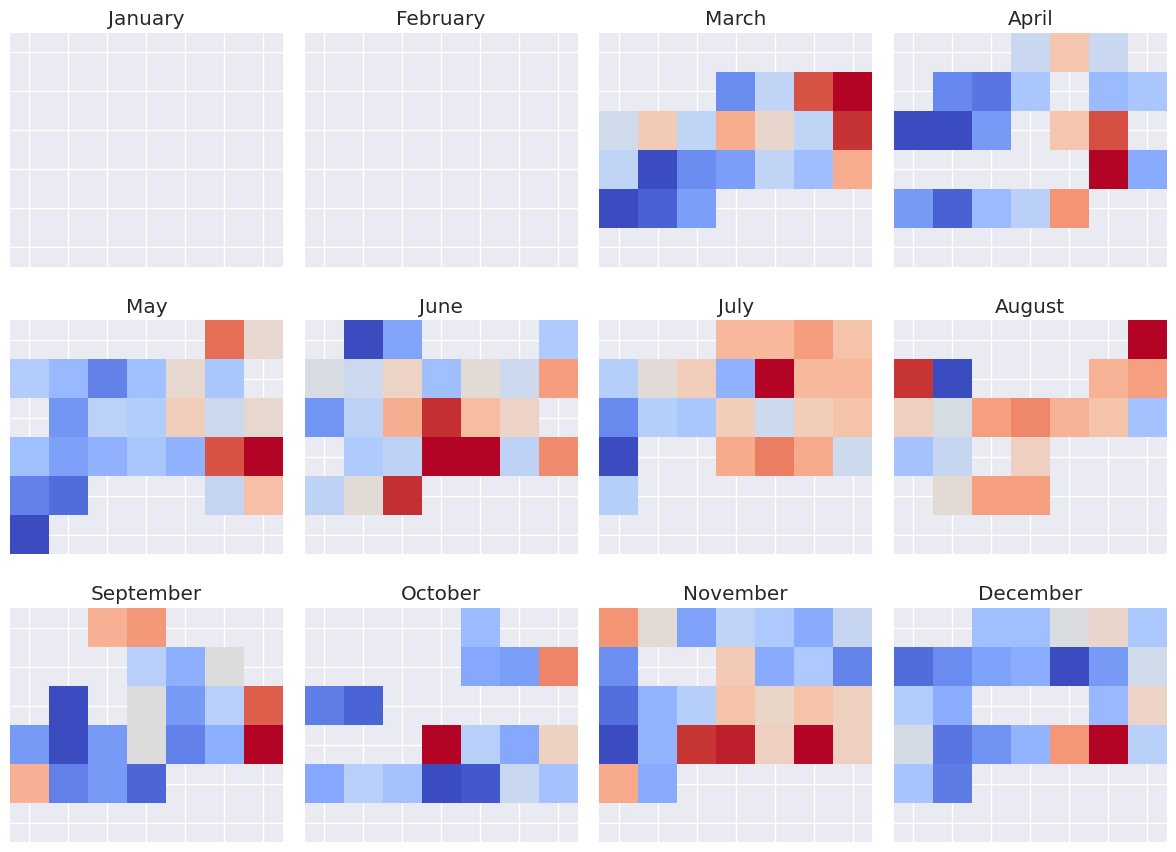

In [ ]:
import calendar
def create_monthly_calendar(year, month, dataviz, ax, pollutant):
    # Create a matrix for the days of the month
    max_day = calendar.monthrange(year, month)[1]
    month_matrix = np.full((6, 7), np.nan)  # 6 weeks, 7 days a week

    # Fill the matrix with the pollutant data
    for day in range(1, max_day + 1):
        day_index = pd.Timestamp(year=year, month=month, day=day)
        weekday = day_index.weekday()
        week_of_month = (day + calendar.monthrange(year, month)[0] - 1) // 7
        if day_index in dataviz.index:
            month_matrix[week_of_month, weekday] = dataviz.loc[day_index, pollutant]

    # Plot the matrix as a heatmap
    sns.heatmap(month_matrix, ax=ax, cmap='coolwarm', square=True, cbar=False)
    ax.set_title(calendar.month_name[month])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))  # for a full year calendar
for month, ax in enumerate(axes.flatten(), 1):
    create_monthly_calendar(2004, month, dataviz, ax, 'CO(GT)')

plt.tight_layout()
plt.show()

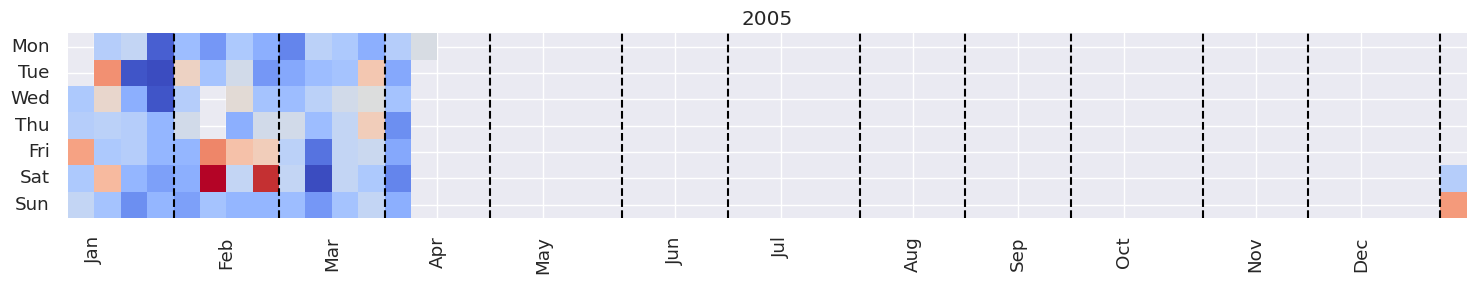

In [ ]:
import calendar

def create_calendar_heatmap(year, dataviz, pollutant, ax):
    # Month and day labels
    month_labels = [calendar.month_abbr[i] for i in range(1, 13)]
    day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

    # Initialize the day grid with NaN values
    day_grid = np.nan * np.zeros((7, 53))  # 7 days, up to 53 weeks

    for month in range(1, 13):
        month_data = dataviz.loc[(dataviz.index.year == year) & (dataviz.index.month == month), pollutant]
        for day in month_data.index:
            week_of_year = day.isocalendar()[1] - 1  # Subtract 1 for zero-indexed array
            day_of_week = day.weekday()  # Monday=0, Sunday=6
            day_grid[day_of_week, week_of_year] = month_data[day]

    # Plot the heatmap
    sns.heatmap(day_grid, mask=np.isnan(day_grid), ax=ax, square=True, cbar=False, cmap='coolwarm')
    ax.set_title(f'{year}')
    ax.set_yticklabels(day_labels, rotation=0)
    ax.set_xticklabels([])

    # Add month separators
    for month in range(1, 13):
        month_start = pd.Timestamp(year=year, month=month, day=1)
        week_of_year = month_start.isocalendar()[1] - 1
        ax.axvline(x=week_of_year, color='black', linestyle='--')

    ax.set_xticks([pd.Timestamp(year=year, month=m, day=15).isocalendar()[1] - 1 for m in range(1, 13)])
    ax.set_xticklabels(month_labels, rotation=90)

# Usage example
fig, ax = plt.subplots(figsize=(15, 5))
create_calendar_heatmap(2005, dataviz, 'CO(GT)', ax)
plt.tight_layout()
plt.show()


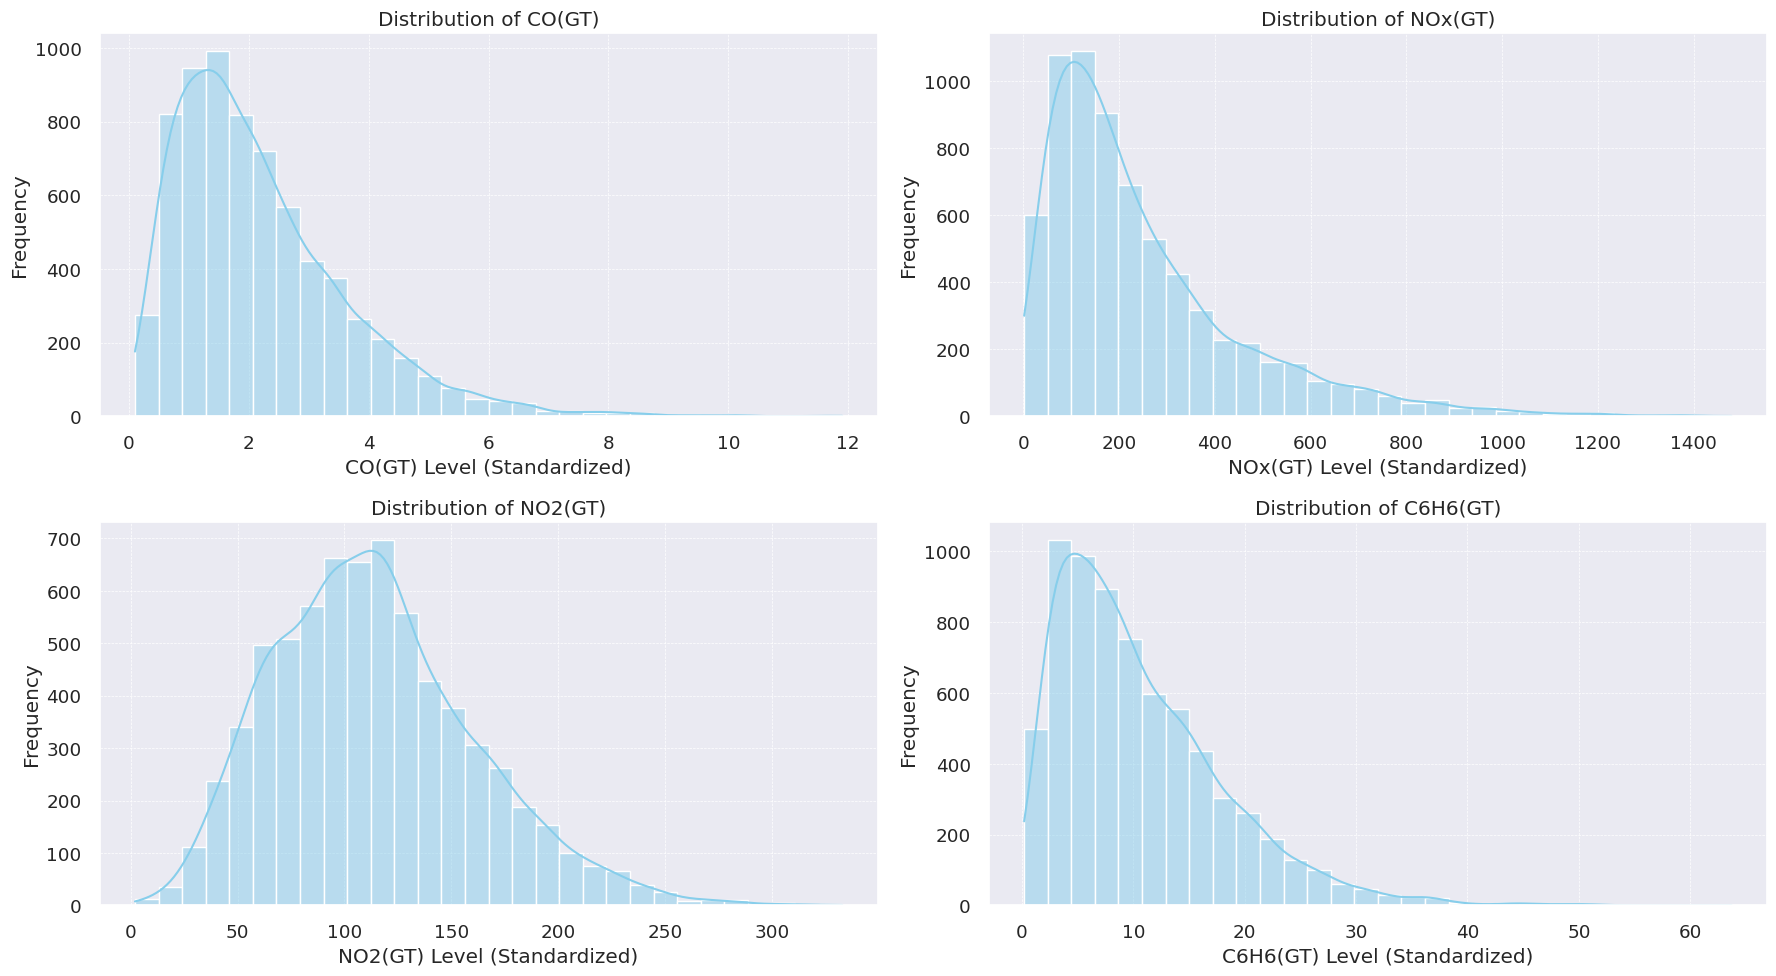

In [ ]:
# Distribution of Major Pollutants
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'C6H6(GT)']

plt.figure(figsize=(18, 10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dataviz[pollutant], bins=30, color='skyblue', kde=True)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(f'{pollutant} Level (Standardized)')
    plt.ylabel('Frequency')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


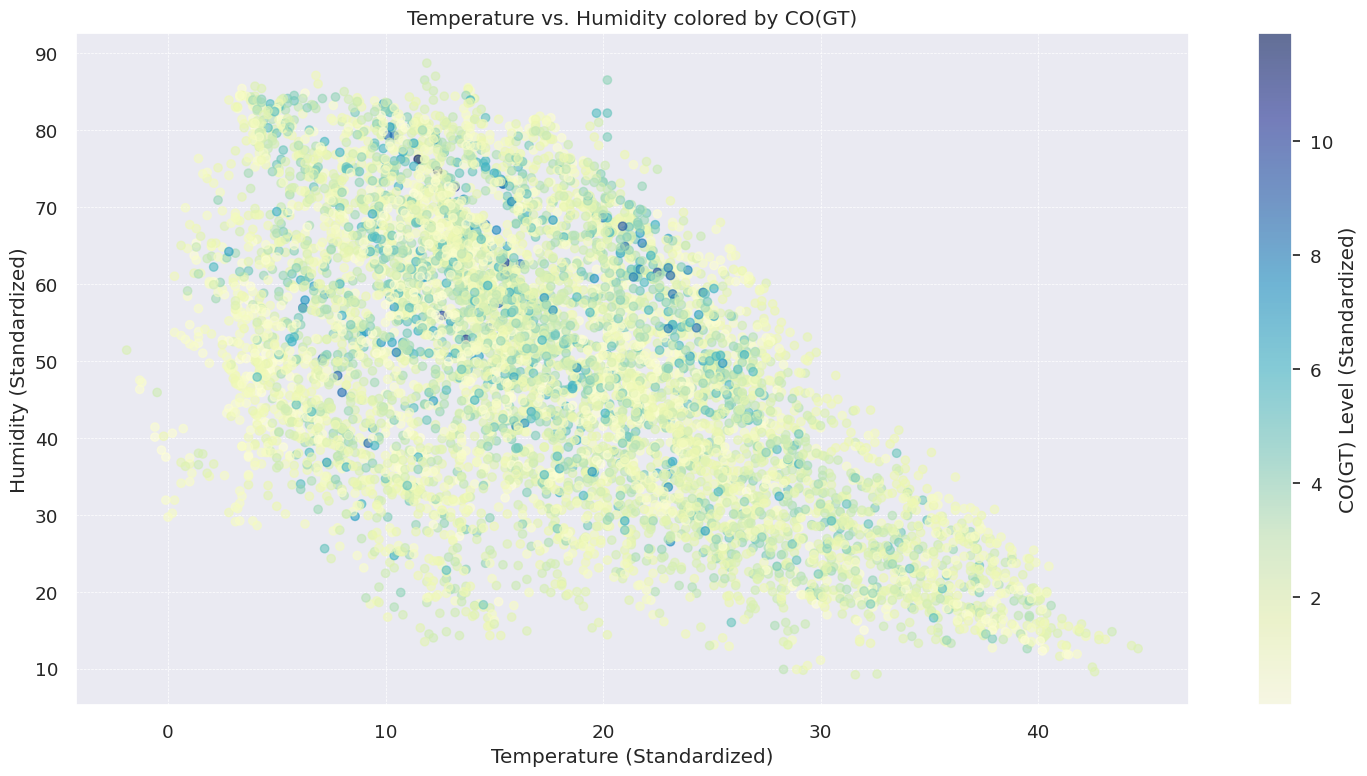

In [ ]:
# Scatter Plot of Temperature vs. Humidity colored by CO(GT)
plt.figure(figsize=(15, 8))
scatter = plt.scatter(dataviz['T'], dataviz['RH'], c=dataviz['CO(GT)'], cmap='YlGnBu', alpha=0.6)
plt.colorbar(scatter, label='CO(GT) Level (Standardized)')
plt.title('Temperature vs. Humidity colored by CO(GT)')
plt.xlabel('Temperature (Standardized)')
plt.ylabel('Humidity (Standardized)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
dataviz.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
DateTime                                                                     
2004-03-10 18:00:00     2.6       1360.0      11.9         1046.0    166.0   
2004-03-10 19:00:00     2.0       1292.0       9.4          955.0    103.0   
2004-03-10 20:00:00     2.2       1402.0       9.0          939.0    131.0   
2004-03-10 21:00:00     2.2       1376.0       9.2          948.0    172.0   
2004-03-10 22:00:00     1.6       1272.0       6.5          836.0    131.0   

                     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
DateTime                                                                      
2004-03-10 18:00:00        1056.0    113.0        1692.0       1268.0  13.6   
2004-03-10 19:00:00        1174.0     92.0        1559.0        972.0  13.3   
2004-03-10 20:00:00        1140.0    114.0        1555.0       1074.0  11.9   
2004-03-10 21:00:00        1092.0    122.0        1584.0       1203.0  11.0   
2004-03-10 22:00:00        1205.0    116.0        1490.0       1110.0  11.2   

                       RH      AH  Year  Month  Hour Year-Month  
DateTime                                                         
2004-03-10 18:00:00  48.9  0.7578  2004      3    18    2004-03  
2004-03-10 19:00:00  47.7  0.7255  2004      3    19    2004-03  
2004-03-10 20:00:00  54.0  0.7502  2004      3    20    2004-03  
2004-03-10 21:00:00  60.0  0.7867  2004      3    21    2004-03  
2004-03-10 22:00:00  59.6  0.7888  2004      3    22    2004-03

In [ ]:
data.head()

CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
DateTime                                                                     
2004-03-10 18:00:00     2.6       1360.0      11.9         1046.0    166.0   
2004-03-10 19:00:00     2.0       1292.0       9.4          955.0    103.0   
2004-03-10 20:00:00     2.2       1402.0       9.0          939.0    131.0   
2004-03-10 21:00:00     2.2       1376.0       9.2          948.0    172.0   
2004-03-10 22:00:00     1.6       1272.0       6.5          836.0    131.0   

                     PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  \
DateTime                                                                      
2004-03-10 18:00:00        1056.0    113.0        1692.0       1268.0  13.6   
2004-03-10 19:00:00        1174.0     92.0        1559.0        972.0  13.3   
2004-03-10 20:00:00        1140.0    114.0        1555.0       1074.0  11.9   
2004-03-10 21:00:00        1092.0    122.0        1584.0       1203.0  11.0   
2004-03-10 22:00:00        1205.0    116.0        1490.0       1110.0  11.2   

                       RH      AH  Year  Month  Hour Year-Month  
DateTime                                                         
2004-03-10 18:00:00  48.9  0.7578  2004      3    18    2004-03  
2004-03-10 19:00:00  47.7  0.7255  2004      3    19    2004-03  
2004-03-10 20:00:00  54.0  0.7502  2004      3    20    2004-03  
2004-03-10 21:00:00  60.0  0.7867  2004      3    21    2004-03  
2004-03-10 22:00:00  59.6  0.7888  2004      3    22    2004-03

## **Multi-variate Time Series Analysis**

### **LSTM (Long Short-Term Memory) Neural Networks**

In [ ]:
!pip install scikeras

In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
pip install keras-tcn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 12.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras_tuner import RandomSearch

In [ ]:
df_1 = pd.concat([df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']], data[['DateTime']]], axis=1)


In [ ]:
features = df_1[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
target = df_1['PT08.S3(NOx)']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.2, random_state=42)

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data to a 3D tensor [Batchsize, timestamps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tcn import TCN
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

# Model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    model.add(TCN(
        nb_filters=hp.Int('nb_filters', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size', values=[2, 3, 4]),
        nb_stacks=hp.Int('nb_stacks', min_value=1, max_value=3, step=1),
        dilations=[1, 2, 4, 8],
        use_layer_norm=hp.Choice('use_layer_norm', values=[True, False]),
        dropout_rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1),
        kernel_initializer=hp.Choice('kernel_initializer', values=['glorot_uniform', 'he_normal'])
    ))

    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mse')

    return model

In [ ]:
# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='my_tcn_tuning_dir',
    project_name='tcn_tuning'
)

In [ ]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Start hyperparameter search
tuner.search(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[early_stop])

Trial 5 Complete [00h 00m 47s]
val_loss: 16810.162109375

Best val_loss So Far: 10805.6181640625
Total elapsed time: 00h 03m 15s


In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Predict with the best model
y_pred = best_model.predict(X_test)

# Compute the metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")

44/44 [==============================] - 1s 9ms/step
MSE: 11588.762808119012, RMSE: 107.65111614896992, MAE: 67.58769504006085, R2: 0.7255684572995091


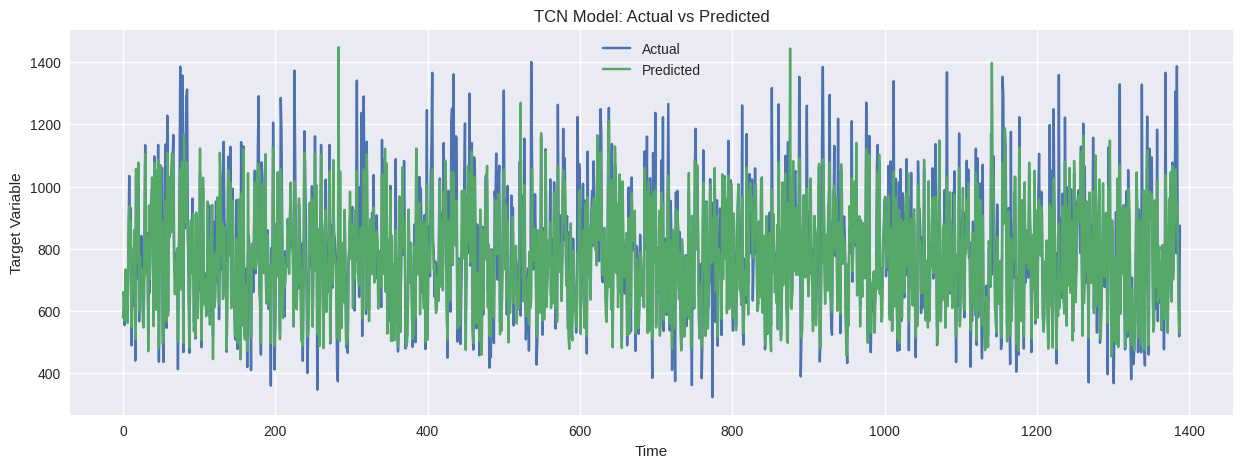

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('TCN Model: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
# Start hyperparameter search with history capturing
history = tuner.search(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[early_stop])


In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


AttributeError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
!pip install keras-tcn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.4 MB/s eta 0:00:00


TCN trail


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, TCN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import kerastuner as kt

# Define the multivariate features and target variables
features = df_1[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']]
target = df_1[['PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']]  # Three target variables

# Split and normalize data (assuming you have already imported the necessary libraries)
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the TCN model building function for hyperparameter tuning
def build_tcn_model(hp):
    model = Sequential()

    # Input layer
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    # TCN layer with tunable hyperparameters
    model.add(TCN(
        nb_filters=hp.Int('nb_filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Int('kernel_size', min_value=2, max_value=5, step=1),
        nb_stacks=hp.Int('nb_stacks', min_value=1, max_value=3),
        dilations=[2 ** i for i in range(hp.Int('num_dilations', min_value=1, max_value=10))],
        activation='relu',
        dropout_rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1),
        return_sequences=False
    ))

    # Output layer with neurons matching the number of target variables
    model.add(Dense(3, activation='linear'))  # Assuming 3 target variables

    # Compile the model with a tunable learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mean_squared_error')

    return model

# # Initialize the hyperparameter tuner
# tuner = kt.RandomSearch(
#     build_tcn_model,
#     objective='val_loss',
#     max_trials=5,  # You can adjust the number of trials
#     directory='my_tcn_tuning_dir',
#     project_name='tcn_tuning'
# )

# # Early stopping callback
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# # Search for the best model
# tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])

# # Get the best model
# best_tcn_model = tuner.get_best_models(num_models=1)[0]

# # Model evaluation on test set
# y_pred_multivariate = best_tcn_model.predict(X_test)  # Predict all target variables

# # Compute metrics separately for each target variable
# mse_multivariate = [mean_squared_error(y_test[:, i], y_pred_multivariate[:, i]) for i in range(3)]  # Assuming 3 target variables
# rmse_multivariate = [sqrt(mse) for mse in mse_multivariate]
# mae_multivariate = [mean_absolute_error(y_test[:, i], y_pred_multivariate[:, i]) for i in range(3)]
# r2_multivariate = [r2_score(y_test[:, i], y_pred_multivariate[:, i]) for i in range(3)]

# # Print metrics for each target variable
# for i in range(3):
#     print(f"Target {i + 1}: MSE: {mse_multivariate[i]}, RMSE: {rmse_multivariate[i]}, MAE: {mae_multivariate[i]}, R2: {r2_multivariate[i]}")


ImportError: ignored

In [ ]:
# Initialize the hyperparameter tuner
tuner = kt.RandomSearch(
    build_tcn_model,
    objective='val_loss',
    max_trials=5,  # You can adjust the number of trials
    directory='my_tcn_tuning_dir',
    project_name='tcn_tuning'
)

In [ ]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Search for the best model
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])


In [ ]:

# Get the best model
best_tcn_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
# Model evaluation on test set
y_pred_multivariate = best_tcn_model.predict(X_test)  # Predict all target variables

In [ ]:
# Compute metrics separately for each target variable
mse_multivariate = [mean_squared_error(y_test[:, i], y_pred_multivariate[:, i]) for i in range(3)]  # Assuming 3 target variables
rmse_multivariate = [sqrt(mse) for mse in mse_multivariate]
mae_multivariate = [mean_absolute_error(y_test[:, i], y_pred_multivariate[:, i]) for i in range(3)]
r2_multivariate = [r2_score(y_test[:, i], y_pred_multivariate[:, i]) for i in range(3)]
# Print metrics for each target variable
for i in range(3):
    print(f"Target {i + 1}: MSE: {mse_multivariate[i]}, RMSE: {rmse_multivariate[i]}, MAE: {mae_multivariate[i]}, R2: {r2_multivariate[i]}")



NameError: ignored

GRU


In [ ]:
from tensorflow.keras.layers import GRU


In [ ]:
def build_gru_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    # GRU Layer with Tunable Hyperparameters
    model.add(GRU(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1),
        kernel_initializer=hp.Choice('kernel_initializer', values=['glorot_uniform', 'he_normal']),
        return_sequences=hp.Choice('return_sequences', values=[True, False])
    ))

    # Optional: Additional GRU Layer
    # Uncomment if you want to stack GRU layers
    # Make sure to set return_sequences=True in the first GRU layer
    # model.add(GRU(
    #     units=hp.Int('units', min_value=32, max_value=256, step=32),
    #     dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
    #     recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1),
    #     kernel_initializer=hp.Choice('kernel_initializer', values=['glorot_uniform', 'he_normal'])
    # ))

    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='mse')

    return model


In [ ]:
gru_tuner = RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='my_gru_tuning_dir',
    project_name='gru_tuning'
)


In [ ]:
gru_tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stop])


Trial 5 Complete [00h 00m 19s]
val_loss: 281619.15625

Best val_loss So Far: 217519.3125
Total elapsed time: 00h 01m 36s


In [ ]:
best_gru_model = gru_tuner.get_best_models(num_models=1)[0]

# Predict with the best model
y_pred_gru = best_gru_model.predict(X_test)

# Compute the metrics
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru = sqrt(mse_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)

# Print the metrics
print(f"MSE: {mse_gru}, RMSE: {rmse_gru}, MAE: {mae_gru}, R2: {r2_gru}")


44/44 [==============================] - 2s 8ms/step


ValueError: ignored

In [ ]:
df_1 = pd.concat([df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']], data[['DateTime']]], axis=1)
features = df_1[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
target = df_1['PT08.S3(NOx)']

# Split and normalize data
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
def build_gru_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    model.add(GRU(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1),
        kernel_initializer=hp.Choice('kernel_initializer', values=['glorot_uniform', 'he_normal']),
        return_sequences=False  # Ensure the output is 2D
    ))

    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']), loss='mse')

    return model


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

gru_tuner = RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='my_gru_tuning_direc',
    project_name='gru_tuning'
)

gru_tuner.search(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[early_stop])


Trial 5 Complete [00h 00m 11s]
val_loss: 463817.3125

Best val_loss So Far: 385041.34375
Total elapsed time: 00h 00m 58s


In [ ]:
best_gru_model = gru_tuner.get_best_models(num_models=1)[0]

y_pred_gru = best_gru_model.predict(X_test).flatten()  # Flatten to ensure it is 2D

# Compute metrics
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru = sqrt(mse_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)

# Print metrics
print(f"MSE: {mse_gru}, RMSE: {rmse_gru}, MAE: {mae_gru}, R2: {r2_gru}")


44/44 [==============================] - 1s 6ms/step
MSE: 373996.9233371103, RMSE: 611.5528786107627, MAE: 574.7370192306003, R2: -7.856558231111082


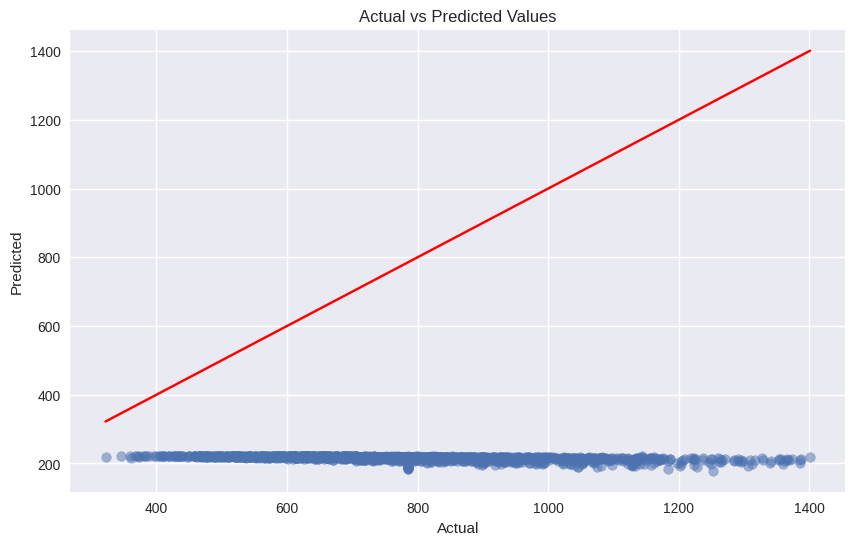

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gru, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()


In [ ]:
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import BayesianOptimization

# Use the same data preparation steps as before

# Define a more complex GRU model building function
def build_advanced_gru_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    for i in range(hp.Int('num_gru_layers', 1, 3)):
        model.add(Bidirectional(GRU(
            units=hp.Int(f'gru_units_{i}', min_value=32, max_value=256, step=32),
            return_sequences=True if i < hp.Int('num_gru_layers', 1, 3) - 1 else False, # Last layer should not return sequences
            dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
            recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.5, step=0.1),
        )))
        if hp.Boolean(f'dropout_layer_{i}'):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    # Compile the model with a tunable learning rate
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-5, max_value=1e-1, sampling='LOG')),
                  loss='mse')

    return model

In [ ]:
# Initialize the Bayesian optimizer tuner
bayesian_tuner = BayesianOptimization(
    build_advanced_gru_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_advanced_gru_tuning_dir',
    project_name='advanced_gru_tuning'
)

In [ ]:
# Start hyperparameter search with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
bayesian_tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])

Trial 10 Complete [00h 03m 21s]
val_loss: 44935.875

Best val_loss So Far: 44923.0859375
Total elapsed time: 00h 42m 38s


In [ ]:
# Get the best model
best_gru_model = bayesian_tuner.get_best_models(num_models=1)[0]

In [ ]:
y_pred_gru = best_gru_model.predict(X_test).flatten()  # Flatten to ensure it is 2D

# Compute metrics
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru = sqrt(mse_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)

# Print metrics
print(f"MSE: {mse_gru}, RMSE: {rmse_gru}, MAE: {mae_gru}, R2: {r2_gru}")


44/44 [==============================] - 1s 4ms/step
MSE: 42282.874190360744, RMSE: 205.62799952915154, MAE: 163.32521662427163, R2: -0.0012936312530233973


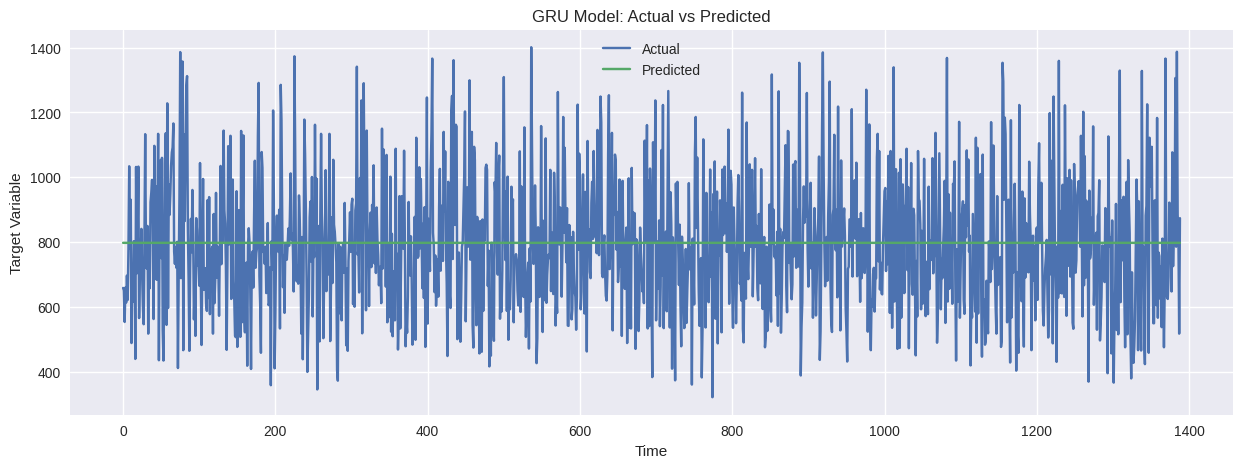

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='Predicted')
plt.title('GRU Model: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])


Epoch 1/100
139/139 [==============================] - 1s 10ms/step - loss: 25815.2109 - val_loss: 10053.1182
Epoch 2/100
139/139 [==============================] - 1s 9ms/step - loss: 24431.7012 - val_loss: 10147.7539
Epoch 3/100
139/139 [==============================] - 1s 9ms/step - loss: 23257.1816 - val_loss: 18083.0488
Epoch 4/100
139/139 [==============================] - 1s 9ms/step - loss: 23294.7578 - val_loss: 11868.0918
Epoch 5/100
139/139 [==============================] - 1s 9ms/step - loss: 22142.2012 - val_loss: 9611.8203
Epoch 6/100
139/139 [==============================] - 2s 11ms/step - loss: 21555.9805 - val_loss: 9995.6309
Epoch 7/100
139/139 [==============================] - 2s 11ms/step - loss: 21325.8613 - val_loss: 15769.2695
Epoch 8/100
139/139 [==============================] - 2s 11ms/step - loss: 20907.2227 - val_loss: 8688.8740
Epoch 9/100
139/139 [==============================] - 1s 9ms/step - loss: 20029.5762 - val_loss: 12869.9619
Epoch 10/100
139/1

In [ ]:
test_loss = best_model.evaluate(X_test, y_test)
print(f"Testing Loss (MSE): {test_loss}")


44/44 [==============================] - 0s 4ms/step - loss: 15775.6602
Testing Loss (MSE): 15775.66015625


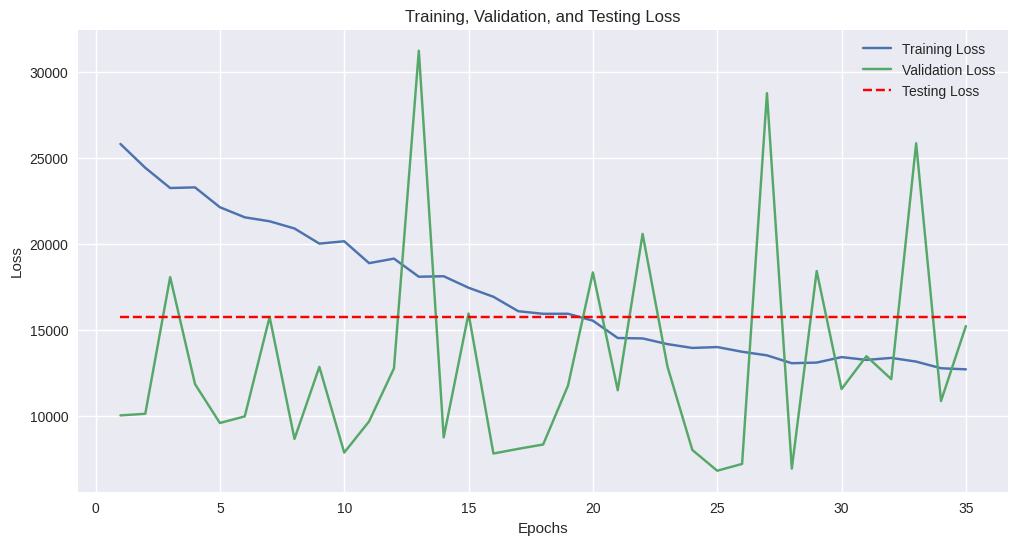

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.hlines(test_loss, xmin=1, xmax=len(epochs), colors='red', label='Testing Loss', linestyles='dashed')

plt.title('Training, Validation, and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
history = best_model.fit(X_train, y_train, epochs=5, validation_split=0.2, callbacks=[early_stop])


Epoch 1/5
139/139 [==============================] - 7s 15ms/step - loss: 32879.8711 - val_loss: 23910.5547
Epoch 2/5
139/139 [==============================] - 2s 11ms/step - loss: 32788.6797 - val_loss: 16762.0117
Epoch 3/5
139/139 [==============================] - 1s 9ms/step - loss: 33642.9766 - val_loss: 18413.2480
Epoch 4/5
139/139 [==============================] - 1s 9ms/step - loss: 30546.5117 - val_loss: 19036.1074
Epoch 5/5
139/139 [==============================] - 1s 9ms/step - loss: 29518.7695 - val_loss: 27965.0547


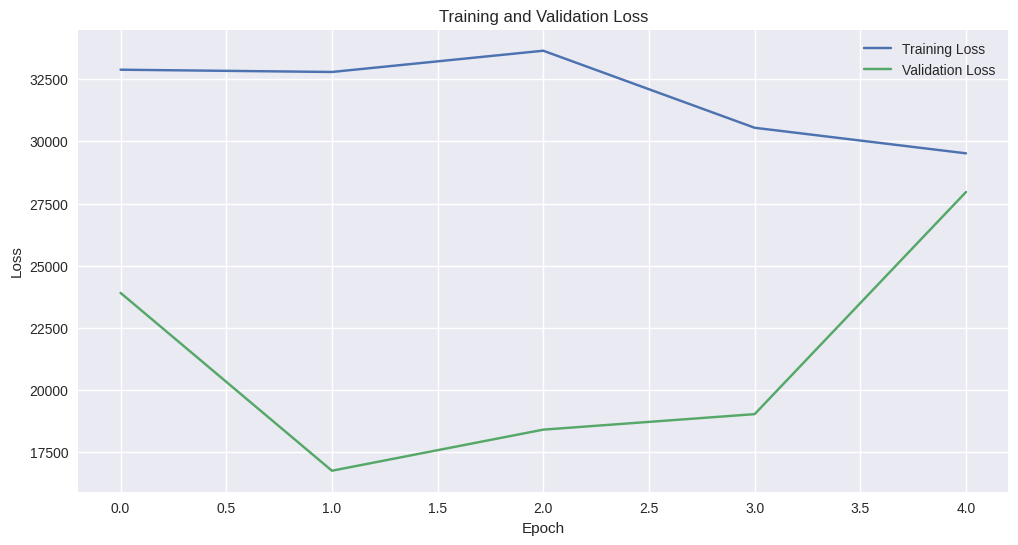

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_loss = best_model.evaluate(X_test, y_test)
print(f"Testing Loss: {test_loss}")


44/44 [==============================] - 0s 6ms/step - loss: 28446.8027
Testing Loss: 28446.802734375


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from tcn import TCN
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

    model.add(TCN(
        nb_filters=hp.Int('nb_filters', min_value=32, max_value=256, step=32),
        kernel_size=hp.Int('kernel_size', min_value=2, max_value=5),
        nb_stacks=hp.Int('nb_stacks', min_value=1, max_value=2),
        dilations=[1, 2, 4, 8],
        dropout_rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.3, step=0.05),
        use_layer_norm=True,
        use_batch_norm=False,
        return_sequences=False,
        activation='relu',
        kernel_initializer='he_uniform'
    ))

    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='mse')

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=1,
    directory='my_tcn_tuning_dir',
    project_name='tcn_tuning'
)

# Early stopping and learning rate reduction callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Start hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop, reduce_lr])

# Get the best model and its performance
best_model = tuner.get_best_models(num_models=1)[0]
test_loss = best_model.evaluate(X_test, y_test)

# Retrain the model and plot the results
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop, reduce_lr])
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Smooth the validation loss
smooth_val_loss = smooth_curve(val_loss)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(smooth_val_loss, label='Smoothed Validation Loss')
plt.hlines(test_loss, xmin=0, xmax=len(train_loss), colors='red', label='Testing Loss', linestyles='dashed')
plt.title('Training, Validation, and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to smooth the curve
def smooth_curve(points, factor=0.75):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
